# LoanGuard: Client Risk Prediction Model for Loan Applications

LoanGuard is a credit risk prediction model designed to ease the loan application process. By using machine learning algorithms, LoanGuard provides financial institutions with a solution for predicting whether the client will have payment difficulties. With LoanGuard, institutions can make data-driven decisions, enhance risk management practices, and optimize loan approval processes.

The heart of LoanGuard lies in its ability to accurately predict the target variable, which indicates whether an application represents a client with payment difficulties (1) or all other cases (0). By analyzing a wide range of features and historical data, LoanGuard uncovers hidden patterns and risk factors that influence the target variable, providing valuable insights into creditworthiness and potential payment difficulties.

LoanGuard streamlines the loan application process by automating decision on client's creditworthiness. This accelerates decision-making, reduces manual effort, and improves operational efficiency for financial institutions. By automating the prediction process, LoanGuard enables faster processing of loan applications, enhances customer satisfaction, and optimizes resource allocation, leading to improved overall productivity and customer experience.

![Image Description](https://images.pexels.com/photos/7731330/pexels-photo-7731330.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2)

LoanGuard was created through a meticulous and comprehensive process. It begins by analyzing various dataframes, including 'bureau_balance,' 'installments_payments,' 'bureau,' 'POS_CASH_balance,' and 'previous_application'. These datasets contain valuable information relevant to each loan application.

Next, I combine the relevant information from these datasets, aligning it with the specific loan application at hand. This step ensures that the model incorporates a holistic view of the applicant's financial history.

To gain deeper insights into the data, I perform Exploratory Data Analysis (EDA). This step helps uncover patterns, trends, and potential risk factors that may influence the prediction of payment difficulties.

Feature engineering and selection techniques are then employed to enhance the predictive power of LoanGuard. Techniques such as chi-squared, mutual information, and Pearson coefficient are used to identify relevant features. Additionally, the FeatureSelector tool from the autofeat module aids in automating the selection process.

To further refine the model, I leverage the power of the Pycaret library. Pycaret allows me to experiment with various machine learning models and select the top five performing ones. These models are then subjected to hyperparameter tuning, where their parameters are fine-tuned to optimize their performance.

To maximize the predictive capabilities of LoanGuard, I employ the bagging technique. This involves combining the predictions from multiple models to generate a final, robust prediction.

Once the model development process is complete, I export the final model to a pkl file, making it easily deployable for use by financial institutions. This meticulous process ensures that LoanGuard is a reliable and efficient tool for automating creditworthiness assessments, leading to faster loan processing, improved customer satisfaction, and enhanced resource allocation.

In [1]:
''' Importing modules '''
import pandas as pd
import numpy as np 
import pickle
from tensorflow import keras  
import warnings
import helpers
import numpy as np 

from autofeat import FeatureSelector
from pycaret import classification as pycaret_classif
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from joblib import Parallel
from sklearn.base import clone

warnings.filterwarnings('ignore')

## First Glimpse of the data

### Application Train

The **application_train.csv** file is one of the main files in the Home Credit Default Risk dataset. This file contains information about loan applicants' demographics, financial and credit history, and whether they have defaulted on their previous loans.

The file has 307511 rows and 122 columns.

In [2]:
''' reading the application dataset '''
df_application = pd.read_csv("home_credit_risk/application_train.csv") 
df_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
''' checking for null values in application '''
df_application = helpers.drop_duplicates_from_df(df_application)

No duplicates found.


In [4]:
''' Printing out number of columns in dataset '''
application_columns = df_application.columns.values
print(f"There are {len(application_columns)} of columns in application_train.csv dataframe.")

There are 122 of columns in application_train.csv dataframe.


In [5]:
''' Displaying missing data in application dataset ''' 
percent_missing = (df_application.isnull().sum() / df_application.isnull().count()*100).sort_values(ascending = False)
missing_df_application  = pd.concat([df_application.isnull().sum().sort_values(ascending = False), percent_missing], axis=1, keys=['Total', 'Percent'])
missing_df_application[missing_df_application.Total > 0]

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
...                          ...        ...
EXT_SOURCE_2                 660   0.214626
AMT_GOODS_PRICE              278   0.090403
AMT_ANNUITY                   12   0.003902
CNT_FAM_MEMBERS                2   0.000650
DAYS_LAST_PHONE_CHANGE         1   0.000325

[67 rows x 2 columns]

### Bureau & Bureau Balance

Bureau data contains credit bureau data for clients who have previous loans with other financial institutions. This data can **provide valuable insights into a client's credit history**, such as how many loans they have taken out, their credit limit, their repayment behavior, and their current debt obligations.

#### Bureau

The bureau dataset contains information from credit bureaus about the applicant's previous loans and credit lines. It includes details such as the loan amount, credit type, loan status, and other relevant information. This dataset is useful for understanding the applicant's credit history and assessing their creditworthiness.

In [6]:
''' Reading the bureau dataset '''
df_bureau = pd.read_csv("home_credit_risk/bureau.csv")
df_bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [7]:
''' Checking for duplicate values ''' 
df_bureau = helpers.drop_duplicates_from_df(df_bureau)

No duplicates found.


In [8]:
''' Printing number of columns in bureau '''
bureau_columns = df_bureau.columns.values
print(f"There are {len(bureau_columns)} of columns in bureau.csv dataframe.")

There are 17 of columns in bureau.csv dataframe.


In [9]:
''' Printing number of missing values '''
percent_missing = (df_bureau.isnull().sum() / df_bureau.isnull().count()*100).sort_values(ascending = False)
missing_df_bureau  = pd.concat([df_bureau.isnull().sum().sort_values(ascending = False), percent_missing], axis=1, keys=['Total', 'Percent'])
missing_df_bureau[missing_df_bureau.Total > 0]

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757

#### Bureau Balance

This dataset contains monthly balance snapshots of previous credit cards and loans that the applicant had with other financial institutions. It provides information about the status of the credit card or loan account, such as the payment status (e.g., whether the payment was on time or delayed) and the outstanding balance.

In [10]:
''' Reading bureau balance dataframe '''
df_bureau_balance = pd.read_csv("home_credit_risk/bureau_balance.csv") 
df_bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [11]:
''' Checking for duplicate values '''
df_bureau_balance = helpers.drop_duplicates_from_df(df_bureau_balance)

No duplicates found.


In [12]:
''' Checking how many columns there are in bureau dataframe ''' 
bureau_balance_columns = df_bureau_balance.columns.values
print(f"There are {len(bureau_balance_columns)} of columns in bureau_balance.csv dataframe.")

There are 3 of columns in bureau_balance.csv dataframe.


In [13]:
''' Checking for bureau balance null values '''
df_bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### Credit Card Balance

Credit card balance data contains information about clients' balances on their credit cards. This data can provide insights into clients' credit utilization rate and their ability to manage their debt.

This dataset is useful for understanding the applicant's credit card usage patterns, such as how much credit they have available, how much they typically spend, and how they manage their credit card payments. Analyzing this data can help in assessing the applicant's creditworthiness and their ability to handle credit card debt.

By incorporating the 'credit_card_balance' dataset along with other datasets in the Home Credit Risk dataset, participants can gain a comprehensive view of the applicant's credit history, loan repayment behavior, and financial patterns. This information can be leveraged to build more accurate models for predicting the risk of defaulting on a loan.

Since we have already used this dataset in the credit_card_fraud_detection.ipynb I will take the model created there and use it for new feature.

In [14]:
''' Reading credit card balance dataset '''
df_cc_balance = pd.read_csv("home_credit_risk/credit_card_balance.csv")
df_cc_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [15]:
''' Taking types of columns '''
categorical_cols, categorical_numerical_cols, continuous_cols, _ = helpers.get_all_column_by_types(df_cc_balance, utilization=True)

In [16]:
''' Reading the deployed model '''
with open('fraud_score_detector.pkl', 'rb') as file:
    credit_card_fraud_detector = pickle.load(file)

In [17]:
''' Creating new is_fraud and anomaly_score features '''
credit_card_fraud_detector.fit(df_cc_balance)
anomaly_scores = credit_card_fraud_detector.decision_function(df_cc_balance) 
predictions = credit_card_fraud_detector.predict(df_cc_balance)

df_cc_balance['anomaly_score'] = anomaly_scores
df_cc_balance['is_fraud'] = predictions
df_cc_balance['is_fraud'] = df_cc_balance['is_fraud'].map(lambda x: 1 if x == -1 else 0 if x == 1 else x)

In [18]:
''' Checking how many columns there exists now in the dataset '''
credit_card_balance_columns = df_cc_balance.columns.values
print(f"There are {len(credit_card_balance_columns)} of columns in credit_card_balance.csv dataframe.")

There are 26 of columns in credit_card_balance.csv dataframe.


In [19]:
''' Checking for missing values '''
percent_missing = (df_cc_balance.isnull().sum() / df_cc_balance.isnull().count()*100).sort_values(ascending = False)
missing_df_cc_balance  = pd.concat([df_cc_balance.isnull().sum().sort_values(ascending = False), percent_missing], axis=1, keys=['Total', 'Percent'])
missing_df_cc_balance[missing_df_cc_balance.Total > 0]

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_INST_MIN_REGULARITY     305236   7.948208
CNT_INSTALMENT_MATURE_CUM   305236   7.948208

### Installments Payments

Installment payment data contains information about clients' installment payments on previous loans. This data can provide insights into clients' repayment behavior and their current financial situation.

In [20]:
''' reading the installments payments dataset '''
df_installments = pd.read_csv("home_credit_risk/installments_payments.csv")
df_installments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [21]:
''' Checking for duplicates '''
df_installments = helpers.drop_duplicates_from_df(df_installments)

No duplicates found.


In [22]:
''' Checking out number of columns in dataset '''
installments_payments_columns = df_installments.columns.values
print(f"There are {len(installments_payments_columns)} of columns in installments_payments.csv dataframe.")

There are 8 of columns in installments_payments.csv dataframe.


In [23]:
''' Checking for missing data in installments dataset ''' 
percent_missing = (df_installments.isnull().sum() / df_installments.isnull().count()*100).sort_values(ascending = False)
missing_df_installments  = pd.concat([df_installments.isnull().sum().sort_values(ascending = False), percent_missing], axis=1, keys=['Total', 'Percent'])
missing_df_installments[missing_df_installments.Total > 0]

Total   Percent
DAYS_ENTRY_PAYMENT   2905  0.021352
AMT_PAYMENT          2905  0.021352

### POS CASH Balance

POS (Point of Sale) cash balance data contains information about clients' balances on their POS loans. This data can provide insights into clients' repayment behavior on their previous loans and their current financial situation.

In [24]:
''' Reading the POS dataset '''
df_POS_balance = pd.read_csv("home_credit_risk/POS_CASH_balance.csv")
df_POS_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [25]:
''' Checking for duplicate columns ''' 
df_POS_balance = helpers.drop_duplicates_from_df(df_POS_balance)

No duplicates found.


In [26]:
''' Checking how many columns exist in POS dataframe ''' 
POS_balance_columns = df_POS_balance.columns.values
print(f"There are {len(POS_balance_columns)} of columns in POS_CASH_balance.csv dataframe.")

There are 8 of columns in POS_CASH_balance.csv dataframe.


In [27]:
''' Checking for missing data in POS balance '''
percent_missing = (df_POS_balance.isnull().sum() / df_POS_balance.isnull().count()*100).sort_values(ascending = False)
missing_df_POS_balance = pd.concat([df_POS_balance.isnull().sum().sort_values(ascending = False), percent_missing], axis=1, keys=['Total', 'Percent'])
missing_df_POS_balance[missing_df_POS_balance.Total > 0]

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675

### Previous Application

Previous application dataframe contains information about clients' previous loan applications with Home Credit. This data can provide insights into clients' previous loan amounts, loan purposes, and whether they have repaid their previous loans on time.

In [28]:
''' Reading previous application '''
df_prev = pd.read_csv("home_credit_risk/previous_application.csv") 
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [29]:
''' Checking for duplicates '''
df_prev = helpers.drop_duplicates_from_df(df_prev)

No duplicates found.


In [30]:
''' Priting out number of columns in dataset '''
previous_application_columns = df_prev.columns.values
print(f"There are {len(previous_application_columns)} of columns in previous_application.csv dataframe.")

There are 37 of columns in previous_application.csv dataframe.


In [31]:
''' Checking for missing data '''
percent_missing = (df_prev.isnull().sum() / df_prev.isnull().count()*100).sort_values(ascending = False)
missing_df_prev = pd.concat([df_prev.isnull().sum().sort_values(ascending = False), percent_missing], axis=1, keys=['Total', 'Percent'])
missing_df_prev[missing_df_prev.Total > 0]

Total    Percent
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_INTEREST_PRIMARY      1664263  99.643698
AMT_DOWN_PAYMENT            895844  53.636480
RATE_DOWN_PAYMENT           895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
NFLAG_INSURED_ON_APPROVAL   673065  40.298129
DAYS_TERMINATION            673065  40.298129
DAYS_LAST_DUE               673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
AMT_GOODS_PRICE             385515  23.081773
AMT_ANNUITY                 372235  22.286665
CNT_PAYMENT                 372230  22.286366
PRODUCT_COMBINATION            346   0.020716
AMT_CREDIT                       1   0.000060

### Descriptions

The 'descriptions.csv' file is a supplementary file that provides descriptions and additional information about each of the main datasets included in the dataset. It serves as a data dictionary or metadata file for the dataset, helping users understand the contents and meaning of the various datasets and their columns.

In [32]:
''' reading descriptions dataset '''
descriptions = pd.read_csv("home_credit_risk/HomeCredit_columns_description.csv", encoding = "ISO-8859-1")
descriptions.head()

Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [33]:
''' Checking for number of columns in dataset '''
descriptions_columns = descriptions.columns.values
print(f"There are {len(descriptions_columns)} of columns in descriptions.csv dataframe.")

There are 5 of columns in descriptions.csv dataframe.


### Data Exploration and Cleaning

#### Applications Dataframe

In [34]:
''' Putting application dataset into df variable '''
df = df_application.copy()

In [35]:
''' Taking categorical and numerical values of dataset '''
org_categorical_cols, org_categorical_numerical_cols, org_continuous_cols, _ = helpers.get_all_column_by_types(df)
all_org_cat_cols = org_categorical_cols + org_categorical_numerical_cols

In [36]:
''' Taking a look at numerical values '''
org_categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

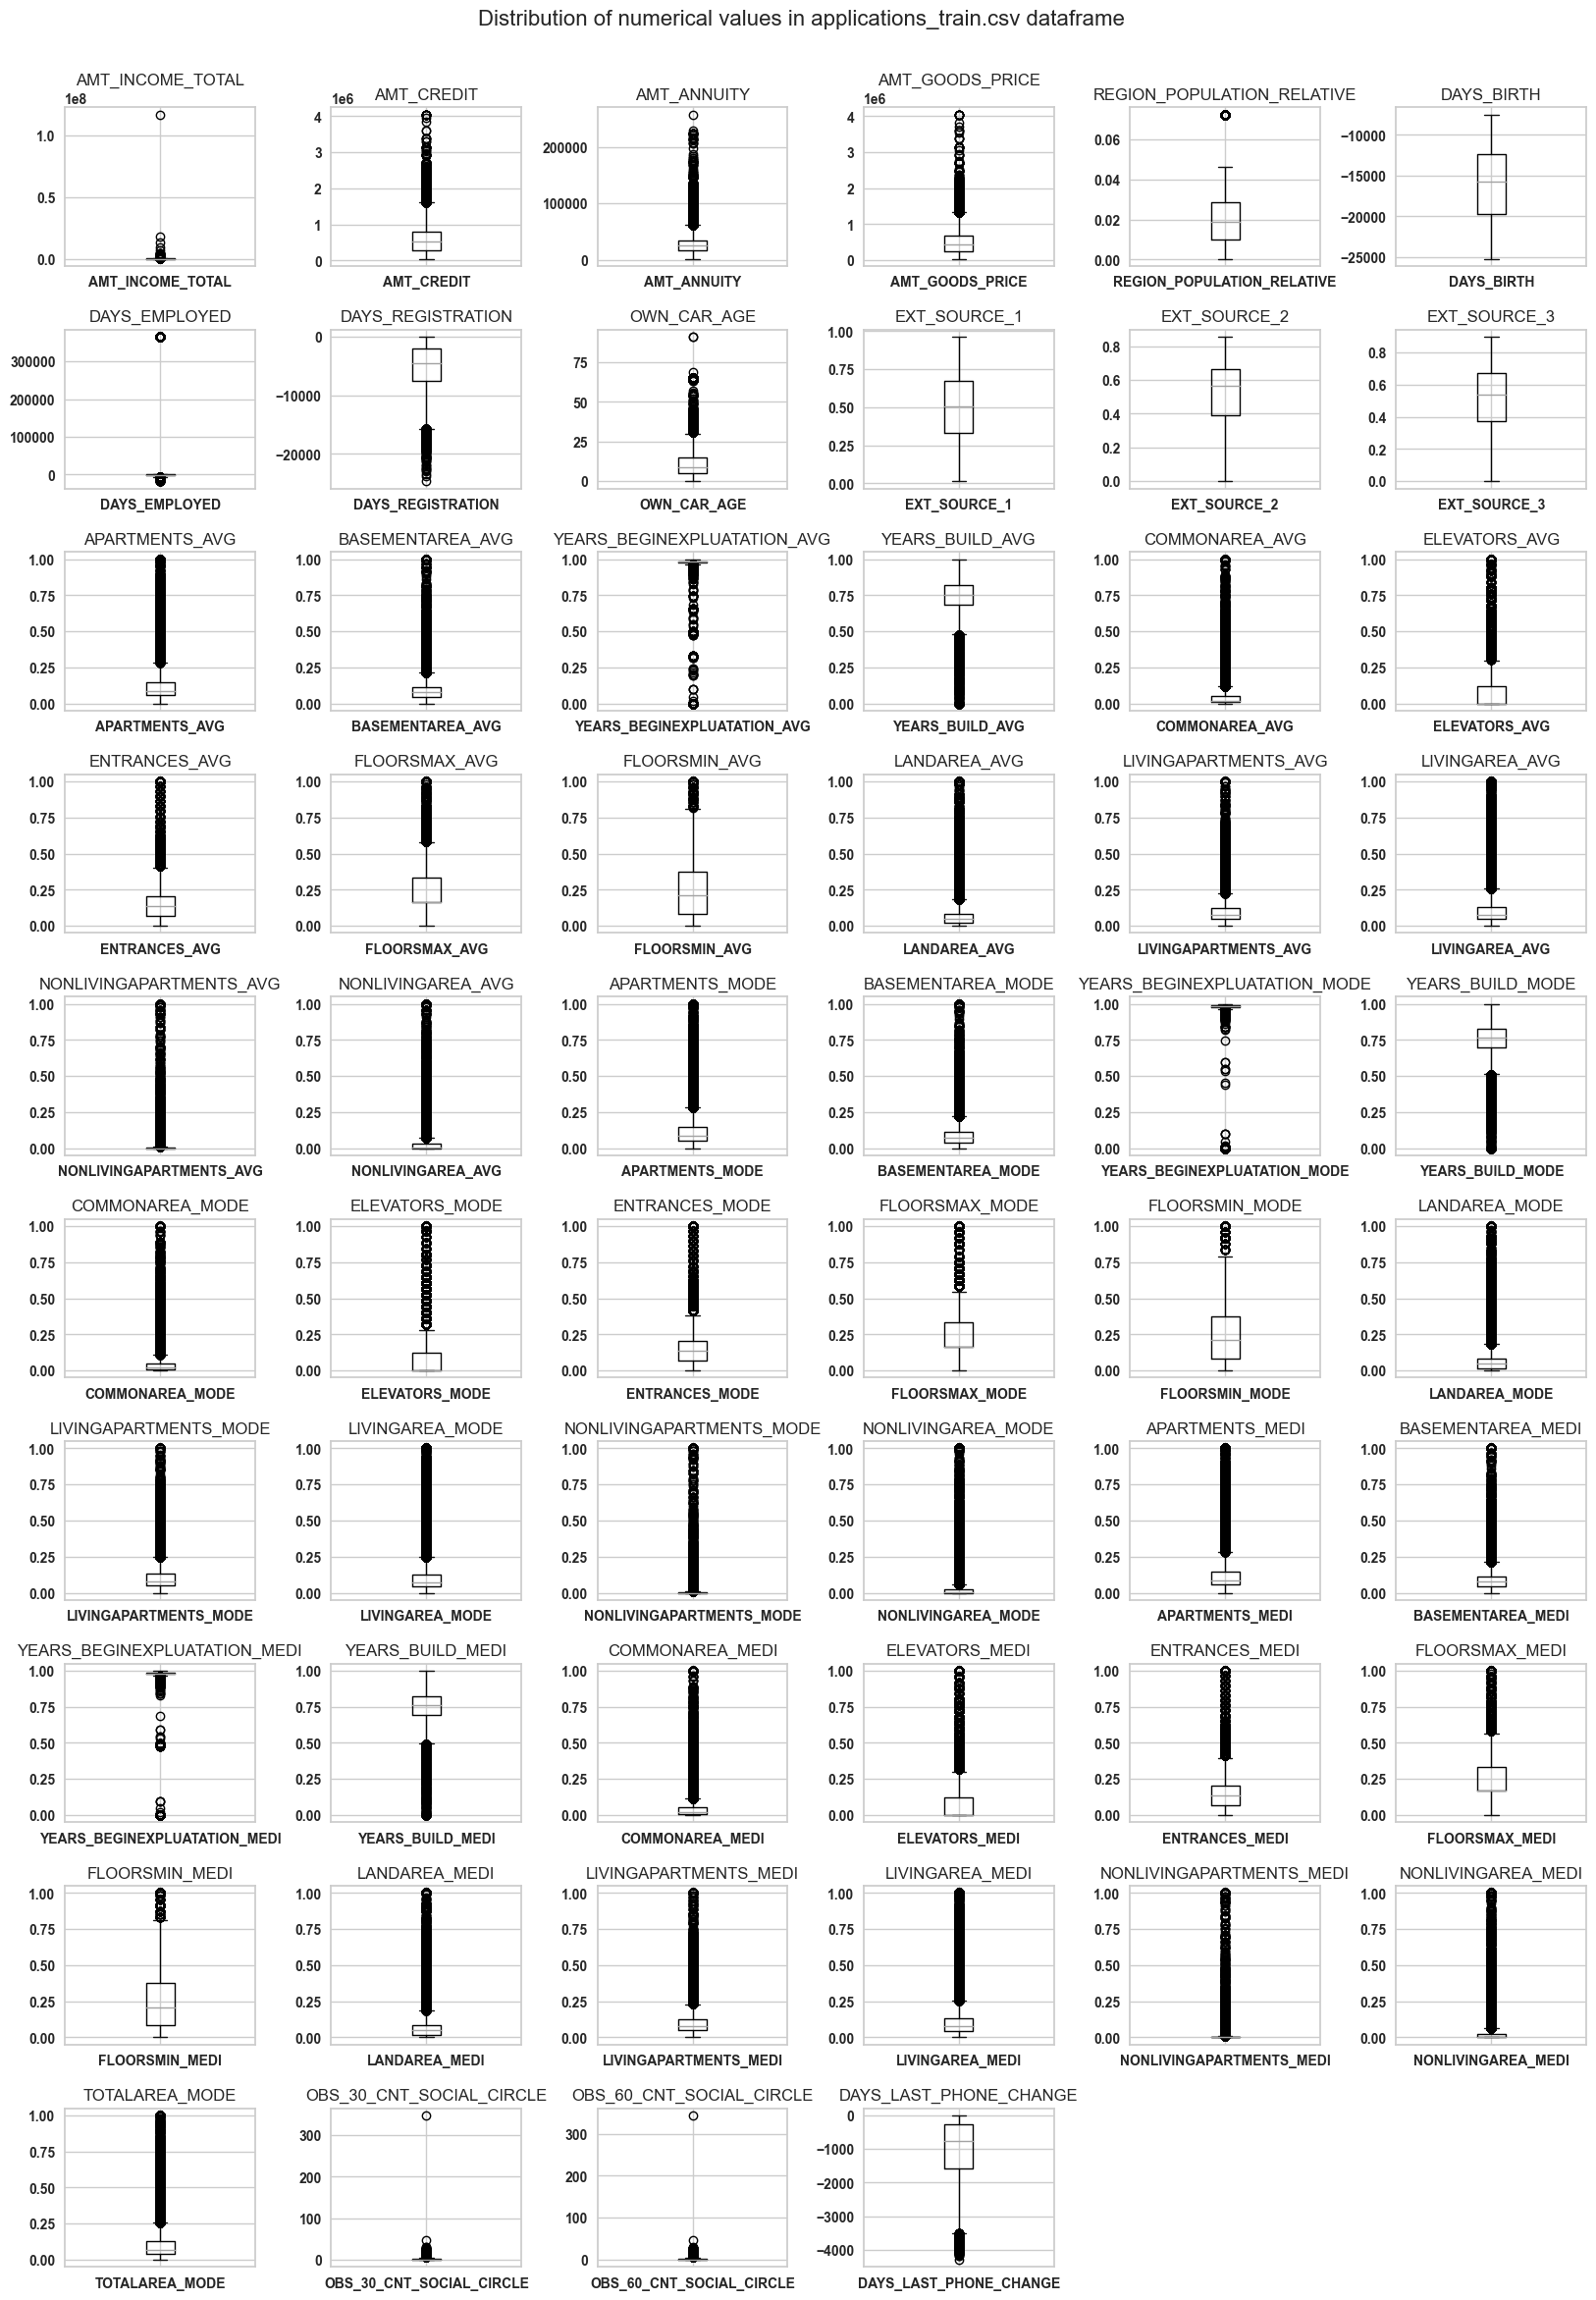

In [37]:
''' Plotting box plots for numerical columns '''
helpers.plot_numerical_vals_box_plots_and_return_outliers(df, org_continuous_cols, "applications_train.csv")

In [38]:
''' Removing impossible days employed values '''
len(df[df['DAYS_EMPLOYED'] <= 0])

252137

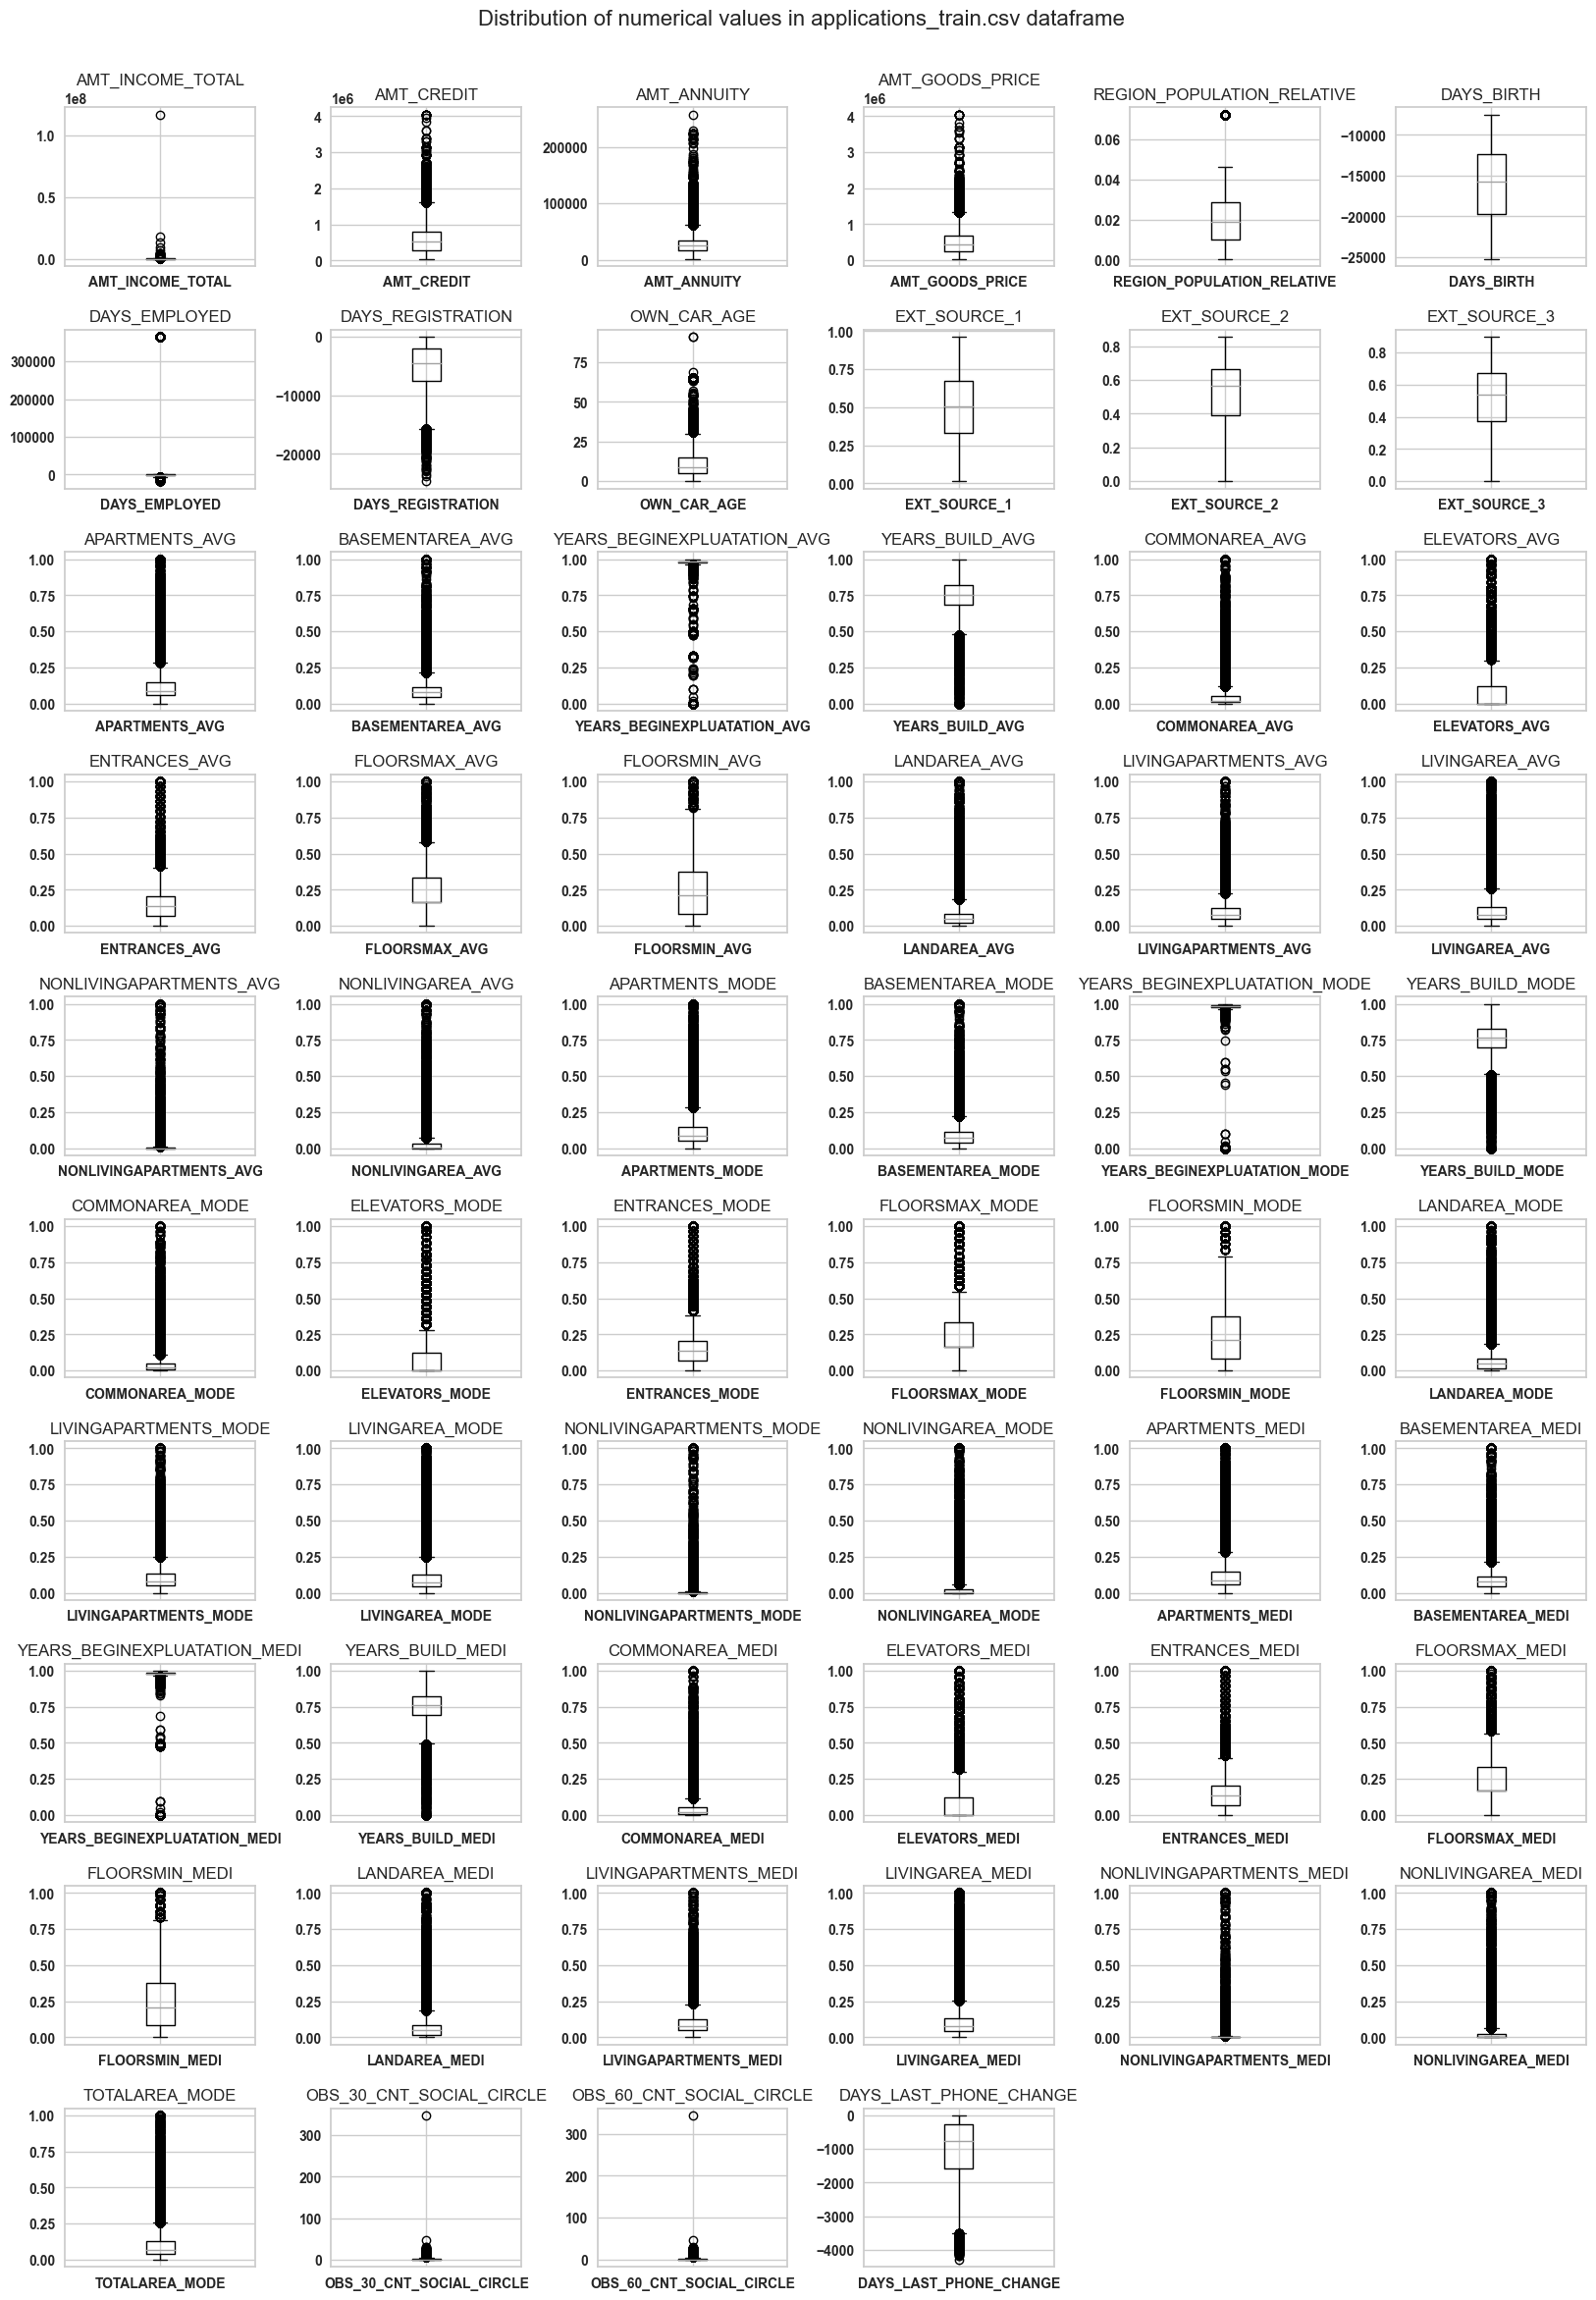

In [39]:
''' Plotting numerical values box plots without bad days employed values '''
helpers.plot_numerical_vals_box_plots_and_return_outliers(df, org_continuous_cols, "applications_train.csv")

In [40]:
''' Taking a look at categorical values '''
df[org_categorical_cols].head()

NAME_CONTRACT_TYPE CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         Cash loans           M   Unaccompanied          Working   
1         Cash loans           F          Family    State servant   
2    Revolving loans           M   Unaccompanied          Working   
3         Cash loans           F   Unaccompanied          Working   
4         Cash loans           M   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0        Laborers                  WEDNESDAY  Business Entity Type 3   
1      Core staff                     MONDAY                  School   
2        Laborers                     MONDAY              Government   
3        Laborers                  WEDNESDAY  Business Entity Type 3   
4      Core staff                   THURSDAY                Religion   

  FONDKAPREMONT_MODE  HOUSETYPE_MODE WALLSMATERIAL_MODE  
0   reg oper account  block of flats       Stone, brick  
1   reg oper account  block of flats              Block  
2                NaN             NaN                NaN  
3                NaN             NaN                NaN  
4                NaN             NaN                NaN

In [41]:
''' Fixing gender values '''
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', np.nan)
df['CODE_GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [42]:
''' Setting to None not specific values of FONDKAPREMONT_MODE '''
df['FONDKAPREMONT_MODE'] = df['FONDKAPREMONT_MODE'].replace('not specified', np.nan)
df['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', nan, 'org spec account',
       'reg oper spec account'], dtype=object)

##### TARGET

First, I wanted to perform hypothesis testing with different continuous values and categorical TARGET.

The function used below perform_multiple_hypothesis_tests_continuous performs multiple hypothesis tests on a continuous dataset.

Here's a breakdown of what the code does:

* It separates the dataset into two groups based on the unique values in the target column.

* It determines the sample size to use for the hypothesis test. It chooses the smaller sample size between the two groups.

* It calculates the mean values for the two groups' samples.

* It performs an independent t-test using the ttest_ind function to compare the means of the two groups' samples.

* It determines whether to reject or not reject the null hypothesis based on the p-value of the t-test. If the p-value is less than 0.05, the null hypothesis is rejected; otherwise, it is not rejected.

* It appends the results of the hypothesis test to the results_df DataFrame, including the column name, mean values for group 1 and group 2, test statistic, p-value, and the outcome of the null hypothesis.

Finally, it returns the results_df DataFrame containing the results of all the hypothesis tests performed on the specified columns.

**In summary, this function allows you to conduct multiple independent t-tests on different columns of a continuous dataset, comparing the means of two groups defined by the unique values in a specified target column. It provides a summary of the test results, including mean values, test statistics, p-values, and whether the null hypothesis was rejected or not.**

In [43]:
''' Performing multiple hypothesis testing with TARGET value '''
df_cols_testing = helpers.perform_multiple_hypothesis_tests_continuous(df, org_continuous_cols, 'TARGET')
print("Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.")
df_cols_testing = df_cols_testing.sort_values(by='p-value', ascending=True)
df_cols_testing.head(50)

Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.


Column  Mean for Group 1  Mean for Group 2  \
9                   EXT_SOURCE_1              0.39              0.51   
10                  EXT_SOURCE_2              0.41              0.52   
11                  EXT_SOURCE_3              0.39              0.52   
5                     DAYS_BIRTH         -14884.83         -16125.97   
57        DAYS_LAST_PHONE_CHANGE           -808.80           -979.36   
6                  DAYS_EMPLOYED          42394.68          66042.08   
3                AMT_GOODS_PRICE         488972.41         545057.19   
7              DAYS_REGISTRATION          -4487.13          -5019.51   
4     REGION_POPULATION_RELATIVE              0.02              0.02   
1                     AMT_CREDIT         557778.53         606688.38   
19                 FLOORSMAX_AVG              0.20              0.23   
47                FLOORSMAX_MEDI              0.20              0.23   
33                FLOORSMAX_MODE              0.20              0.22   
54                TOTALAREA_MODE              0.09              0.10   
23                LIVINGAREA_AVG              0.09              0.11   
51               LIVINGAREA_MEDI              0.10              0.11   
45                ELEVATORS_MEDI              0.06              0.08   
17                 ELEVATORS_AVG              0.06              0.08   
31                ELEVATORS_MODE              0.06              0.08   
37               LIVINGAREA_MODE              0.09              0.11   
12                APARTMENTS_AVG              0.11              0.12   
40               APARTMENTS_MEDI              0.11              0.12   
8                    OWN_CAR_AGE             12.08             13.67   
26               APARTMENTS_MODE              0.10              0.11   
20                 FLOORSMIN_AVG              0.21              0.23   
48                FLOORSMIN_MEDI              0.21              0.23   
34                FLOORSMIN_MODE              0.21              0.23   
13              BASEMENTAREA_AVG              0.08              0.09   
41             BASEMENTAREA_MEDI              0.08              0.09   
2                    AMT_ANNUITY          26481.74          27243.37   
27             BASEMENTAREA_MODE              0.08              0.09   
22          LIVINGAPARTMENTS_AVG              0.09              0.10   
55      OBS_30_CNT_SOCIAL_CIRCLE              1.50              1.38   
56      OBS_60_CNT_SOCIAL_CIRCLE              1.48              1.37   
50         LIVINGAPARTMENTS_MEDI              0.09              0.10   
36         LIVINGAPARTMENTS_MODE              0.10              0.11   
43              YEARS_BUILD_MEDI              0.75              0.76   
15               YEARS_BUILD_AVG              0.74              0.75   
29              YEARS_BUILD_MODE              0.75              0.76   
16                COMMONAREA_AVG              0.04              0.05   
44               COMMONAREA_MEDI              0.04              0.05   
46                ENTRANCES_MEDI              0.14              0.15   
18                 ENTRANCES_AVG              0.14              0.15   
30               COMMONAREA_MODE              0.04              0.04   
32                ENTRANCES_MODE              0.14              0.14   
42  YEARS_BEGINEXPLUATATION_MEDI              0.98              0.98   
14   YEARS_BEGINEXPLUATATION_AVG              0.98              0.98   
53            NONLIVINGAREA_MEDI              0.02              0.03   
25             NONLIVINGAREA_AVG              0.02              0.03   
28  YEARS_BEGINEXPLUATATION_MODE              0.97              0.98   

    Test Statistic        p-value Null Hypothesis  
9       -41.137655   0.000000e+00        REJECTED  
10      -63.518842   0.000000e+00        REJECTED  
11      -64.949517   0.000000e+00        REJECTED  
5        32.305622  1.316574e-226        REJECTED  
57       23.854862  4.573654e-125        REJECTED  
6       -19.982021   1.761735e-88        

In [44]:
''' Taking top 6 columns that have significant difference with different TARGET values '''
df_top_6_cols = df_cols_testing.head(6)
top_6_cols = np.array(df_top_6_cols['Column'])
top_6_cols

array(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED'], dtype=object)

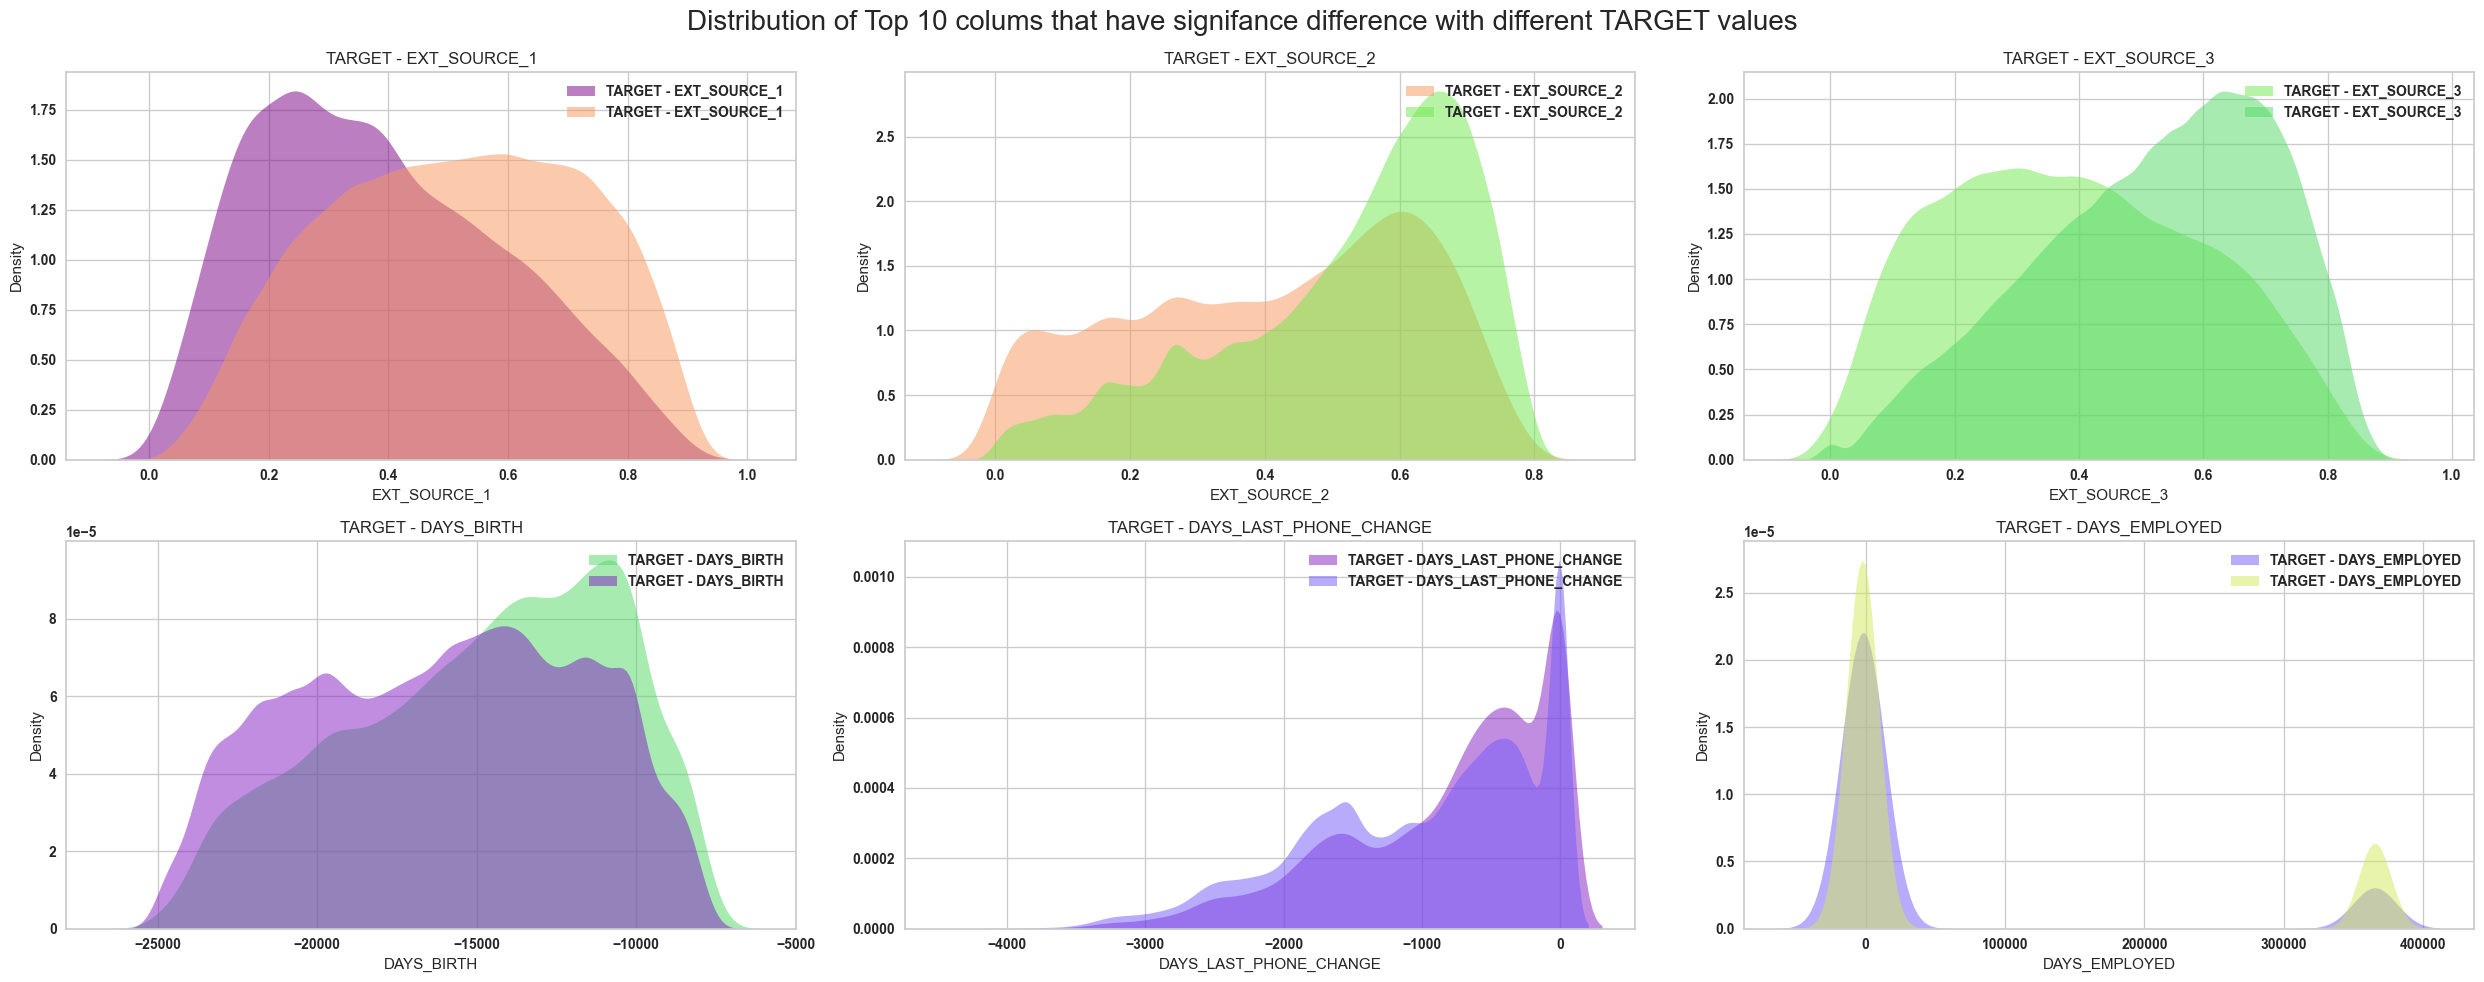

In [45]:
''' Plotting KDE plots for these top 6 columns '''
helpers.plot_top6_hypothesis_test_cols(df, top_6_cols, 'TARGET')

**Target vs AMT_INCOME_TOTAL**

Even though AMT_INCOME_TOTAL didn't come into top 6 columns, I think it is an important feature so I wanted to see its differences with TARGET value.

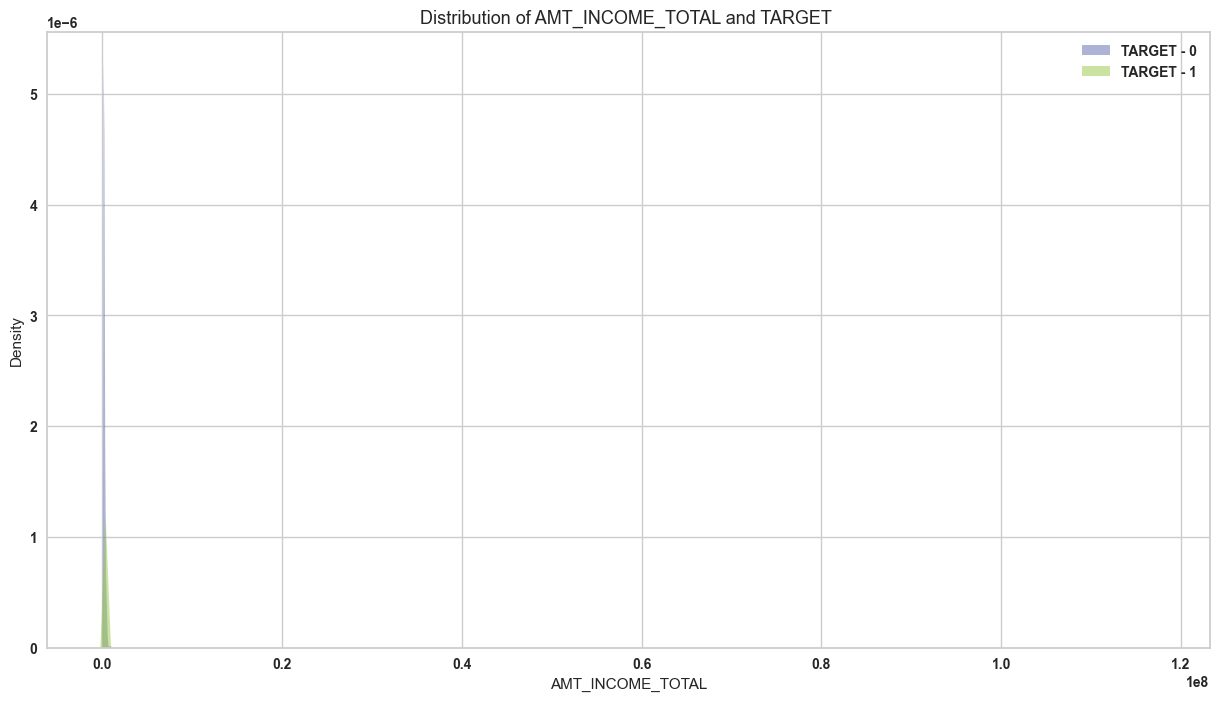

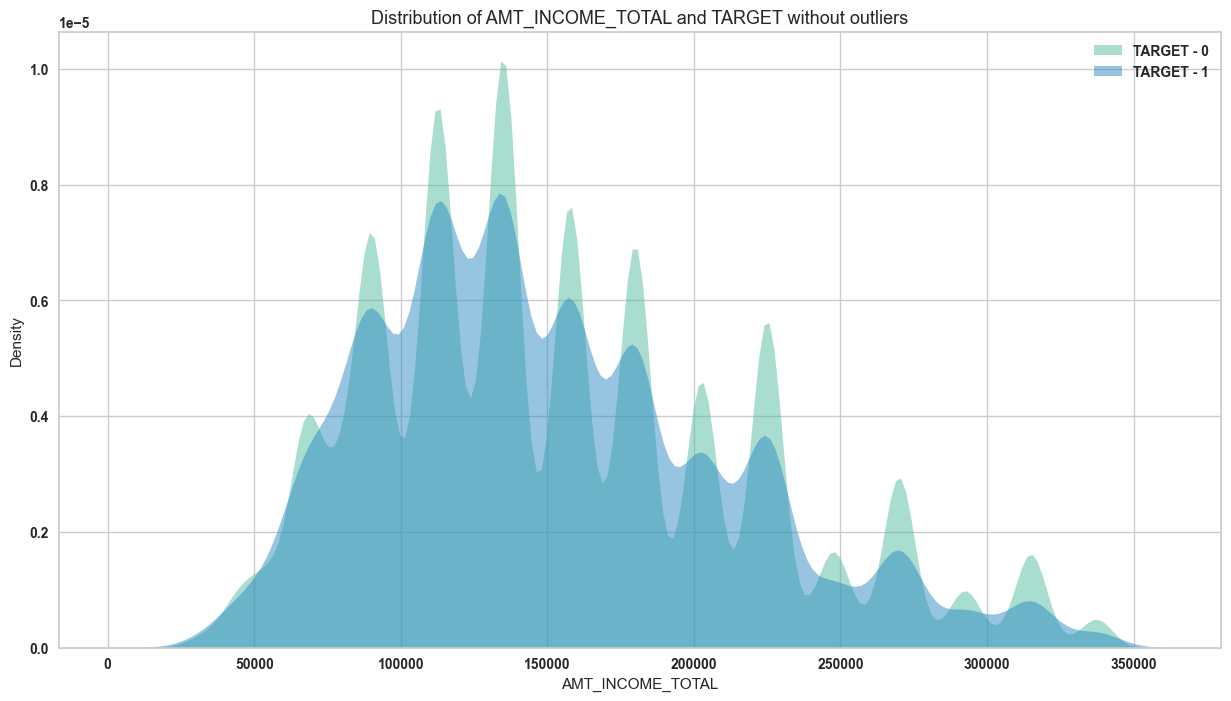

In [46]:
''' Plotting KDE for AMT_INCOME_TOTAL and different TARGET values '''
helpers.plot_two_cols_kde(df, 'AMT_INCOME_TOTAL', 'TARGET')
helpers.plot_two_cols_kde(df, 'AMT_INCOME_TOTAL', 'TARGET', without_outliers=True)

**Target vs AMT_ANNUITY**

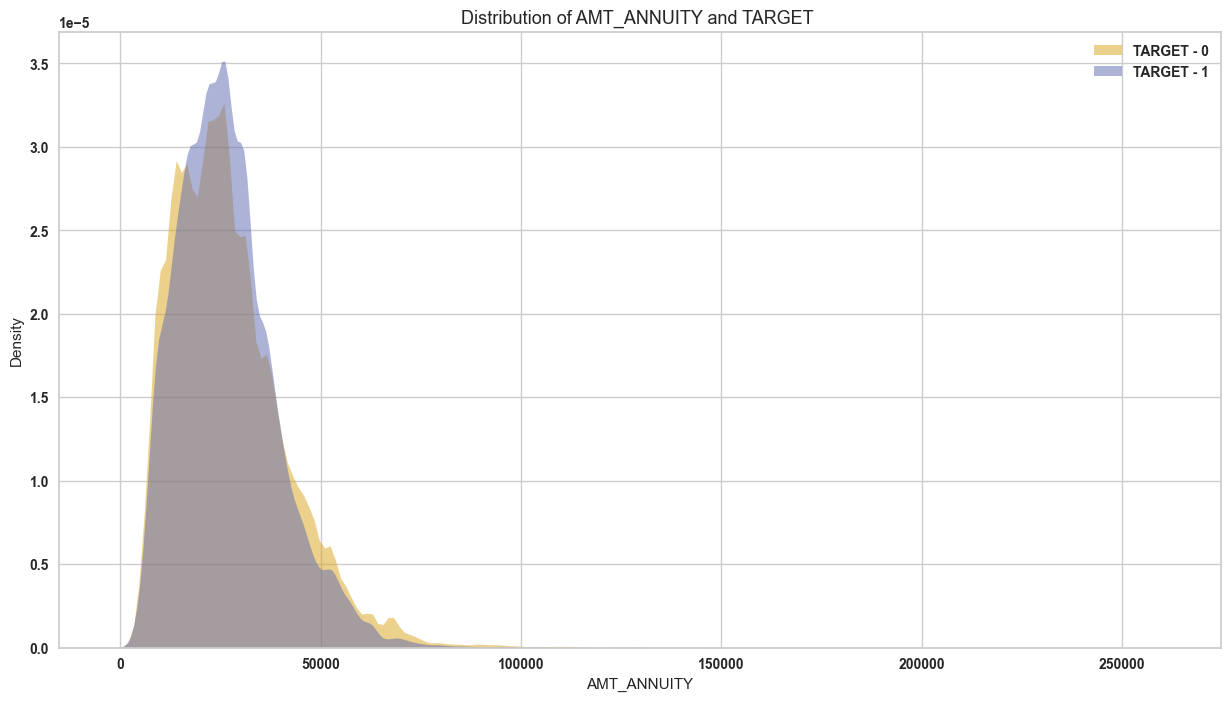

In [47]:
''' Plotting KDE for AMT_ANNUITY and different TARGET values '''
helpers.plot_two_cols_kde(df, 'AMT_ANNUITY', 'TARGET')

**Target vs DAYS_BIRTH**

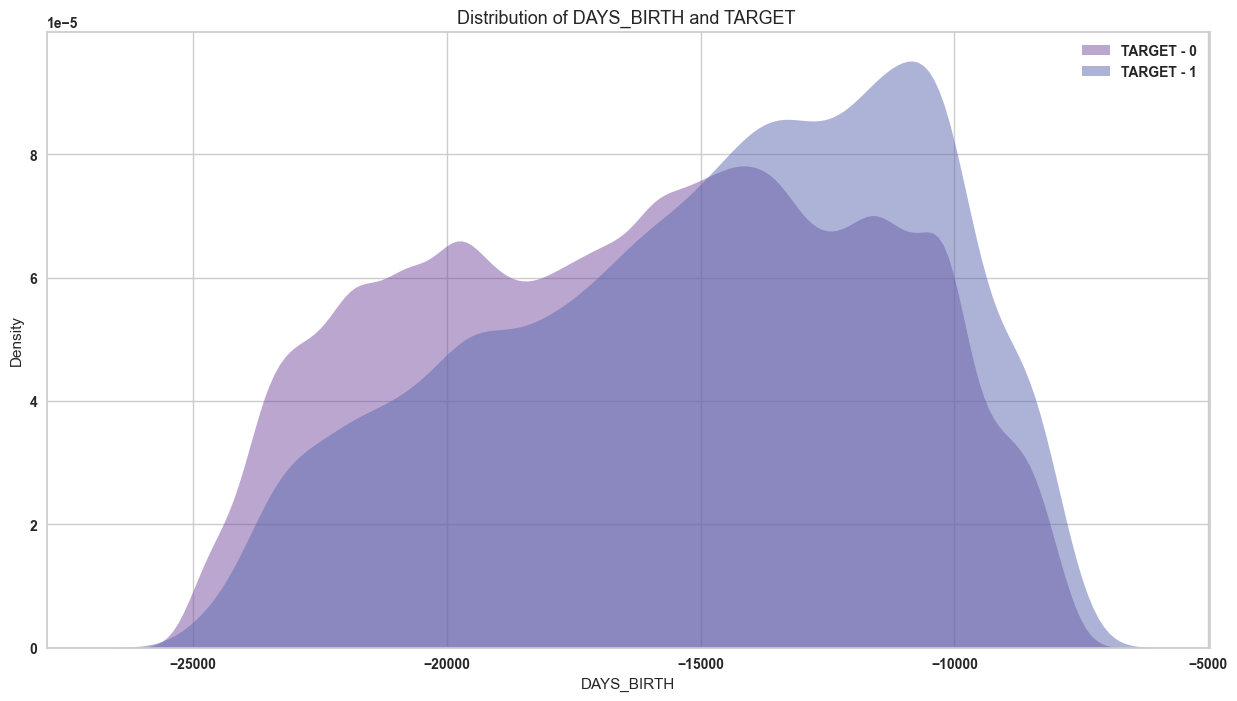

In [48]:
''' Plotting KDE for DAYS_BIRTH and different TARGET values '''
helpers.plot_two_cols_kde(df, 'DAYS_BIRTH', 'TARGET')

**Target vs DAYS_EMPLOYED**

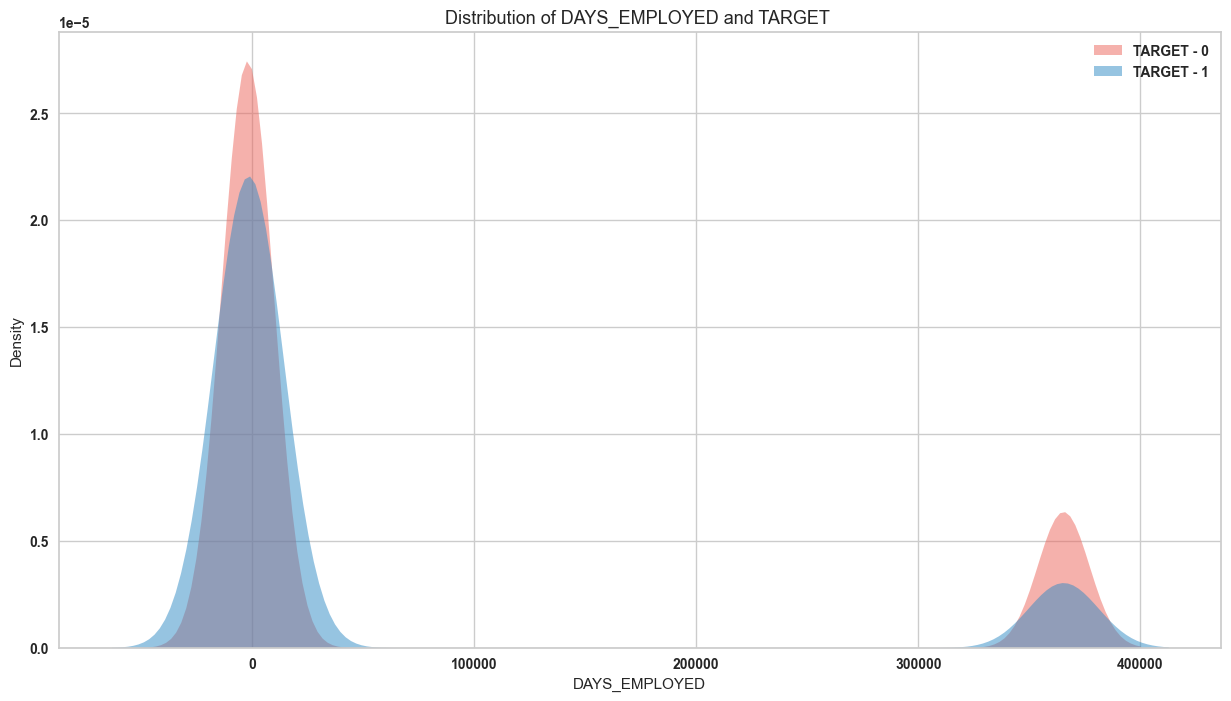

In [49]:
''' Plotting KDE for DAYS_EMPLOYED and different TARGET values '''
helpers.plot_two_cols_kde(df, 'DAYS_EMPLOYED', 'TARGET')

Previously I performed ttest for continuous values, now I wanted to perform chi2_contingency test with other categorical values and see which columns have biggest differences between different TARGET values.


The provided function perform_multiple_hypothesis_tests_categorical performs multiple hypothesis tests on a categorical dataset.

Here's an explanation of what the code does:

* It performs a chi-squared test using the chi2_contingency function to analyze the relationship between the target and the current col column.

* The chi-squared test returns the test statistic, p-value, degrees of freedom, and expected frequencies. However, only the test statistic and p-value are stored in the variables stat and p_value, respectively.

* It determines whether to reject or not reject the null hypothesis based on the p-value of the chi-squared test. If the p-value is less than 0.05, the null hypothesis is rejected; otherwise, it is not rejected.

* It appends the results of the hypothesis test to the results_df DataFrame, including the column name, test statistic, p-value, and the outcome of the null hypothesis.

* Finally, it returns the results_df DataFrame containing the results of all the hypothesis tests performed on the specified columns.

In [50]:
''' Performing chi square test on categorical values '''
df_catcols_testing = helpers.perform_multiple_hypothesis_tests_categorical(df, org_categorical_cols, 'TARGET')
print("Performing hypothesis testing with chi squared contingency for numerical values and different groups of TARGET value for categorical columns.")
df_catcols_testing = df_catcols_testing.sort_values(by='p-value', ascending=True)
df_catcols_testing

Performing hypothesis testing with chi squared contingency for numerical values and different groups of TARGET value for categorical columns.


Column  Test Statistic        p-value Null Hypothesis
9            ORGANIZATION_TYPE     1609.240636  5.224541e-299        REJECTED
7              OCCUPATION_TYPE     1402.846796  3.784500e-288        REJECTED
3             NAME_INCOME_TYPE     1253.470808  1.928146e-266        REJECTED
4          NAME_EDUCATION_TYPE     1019.213187  2.447681e-219        REJECTED
1                  CODE_GENDER      920.005725  4.394091e-202        REJECTED
5           NAME_FAMILY_STATUS      504.694083  7.744842e-107        REJECTED
6            NAME_HOUSING_TYPE      420.556190   1.099089e-88        REJECTED
0           NAME_CONTRACT_TYPE      293.150542   1.023515e-65        REJECTED
12          WALLSMATERIAL_MODE      139.235314   1.453180e-27        REJECTED
11              HOUSETYPE_MODE       27.632556   9.992328e-07        REJECTED
2              NAME_TYPE_SUITE       32.825315   1.132931e-05        REJECTED
10          FONDKAPREMONT_MODE       12.882708   1.594247e-03        REJECTED
8   WEEKDAY_APPR_PROCESS_START       15.387557   1.744737e-02        REJECTED

In [51]:
''' Getting top 5 features that have biggest differences with Target value '''
top_5_cat_cols = list(df_catcols_testing.head(5)['Column'])
np.array(top_5_cat_cols)

array(['ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'CODE_GENDER'], dtype='<U19')

##### OCCUPATION_TYPE

Therefore, I decided to plot these values as well.

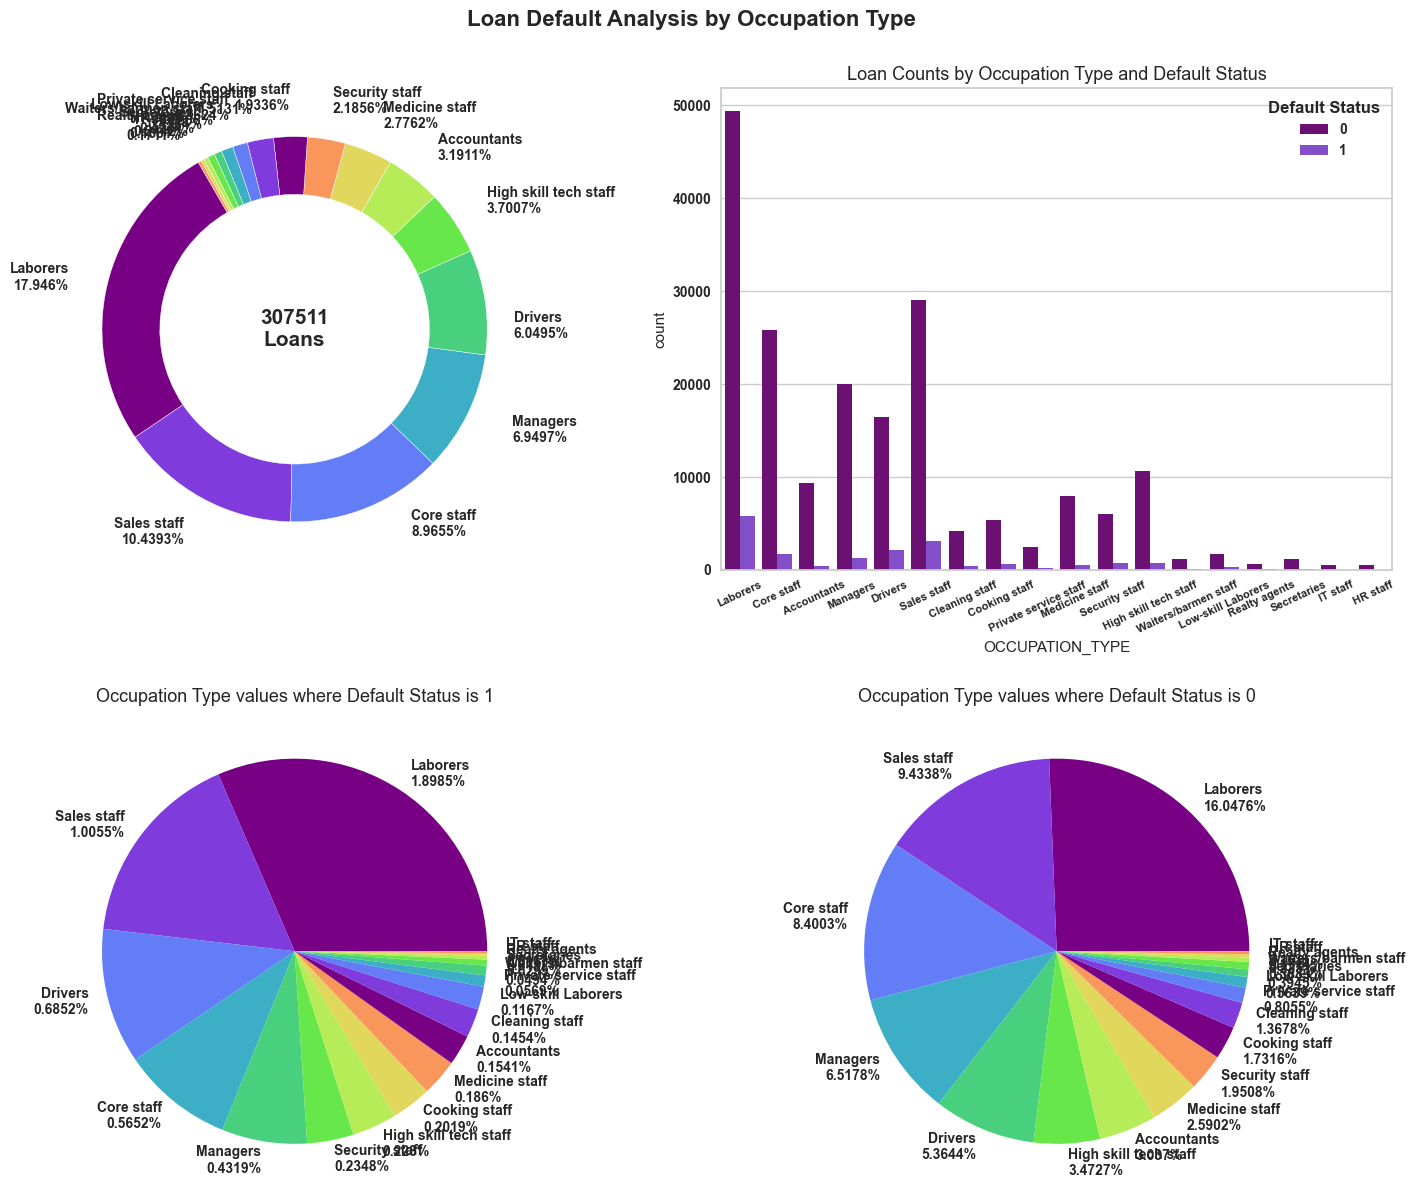

In [52]:
''' Plotting distribution of OCCUPATION_TYPE and target values '''
helpers.plot_multiple_plots_two_categorical('OCCUPATION_TYPE', 'TARGET', 'Occupation Type', 'Default Status', df)

##### NAME_EDUCATION_TYPE

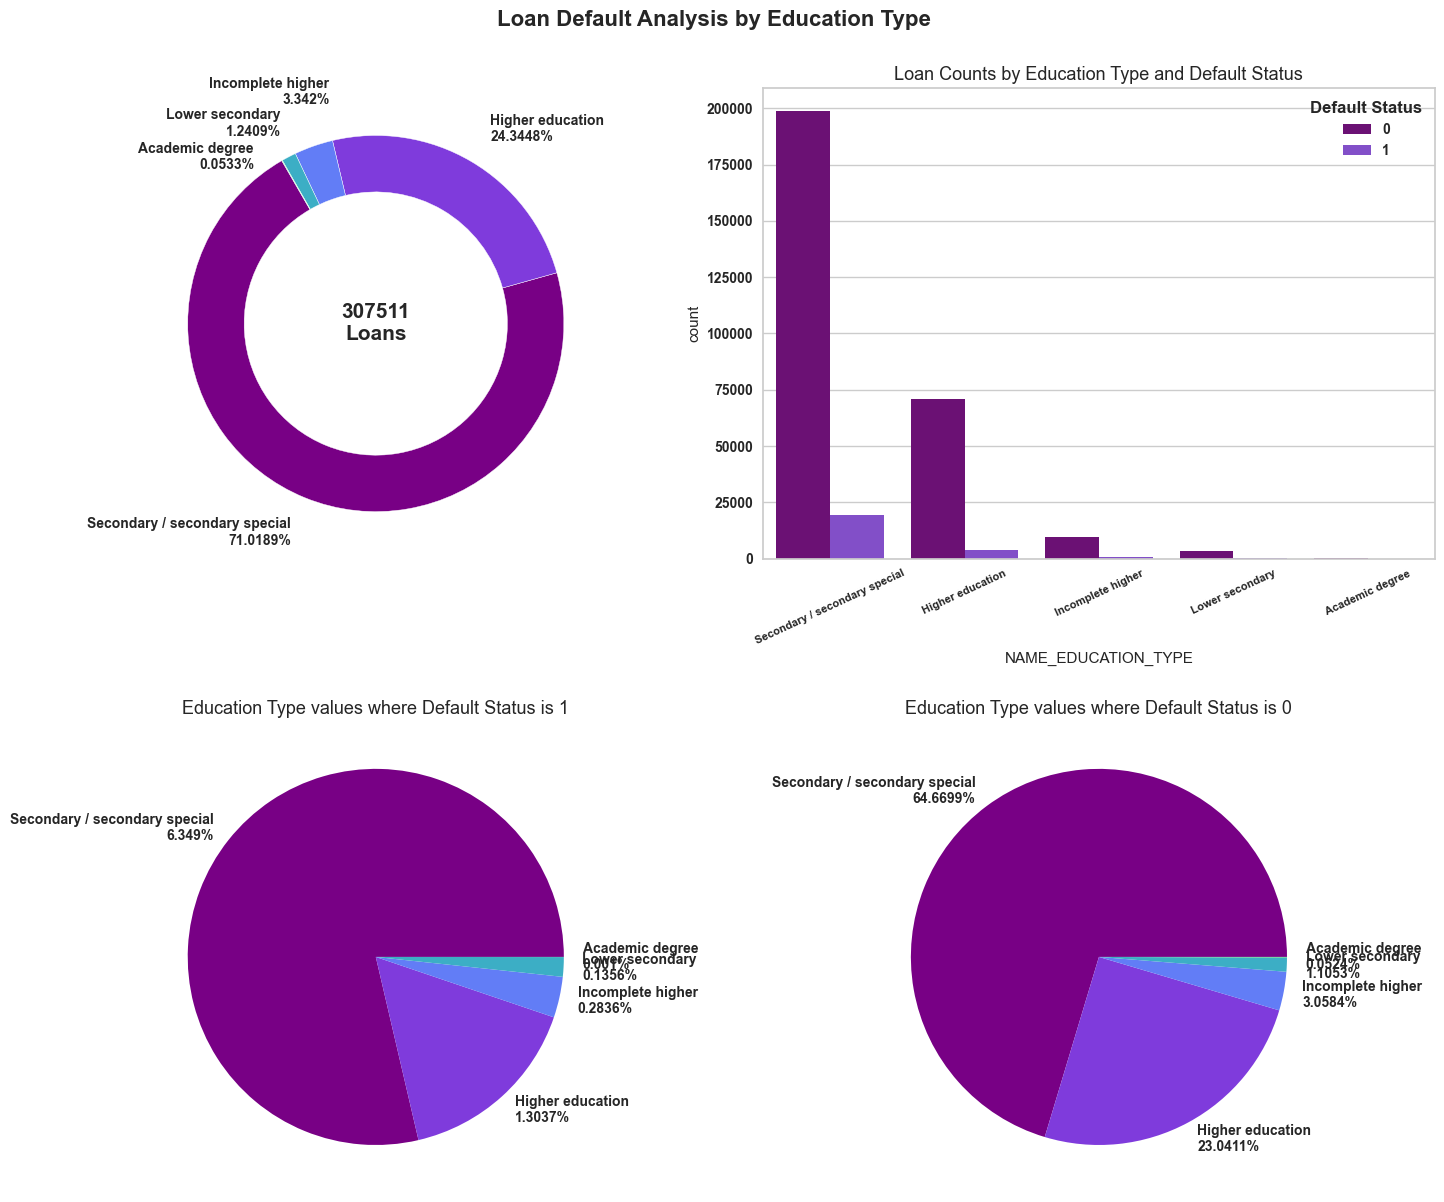

In [53]:
''' Plotting distribution of NAME_EDUCATION_TYPE and target values '''
helpers.plot_multiple_plots_two_categorical('NAME_EDUCATION_TYPE', 'TARGET', 'Education Type', 'Default Status', df)

##### ORGANIZATION_TYPE

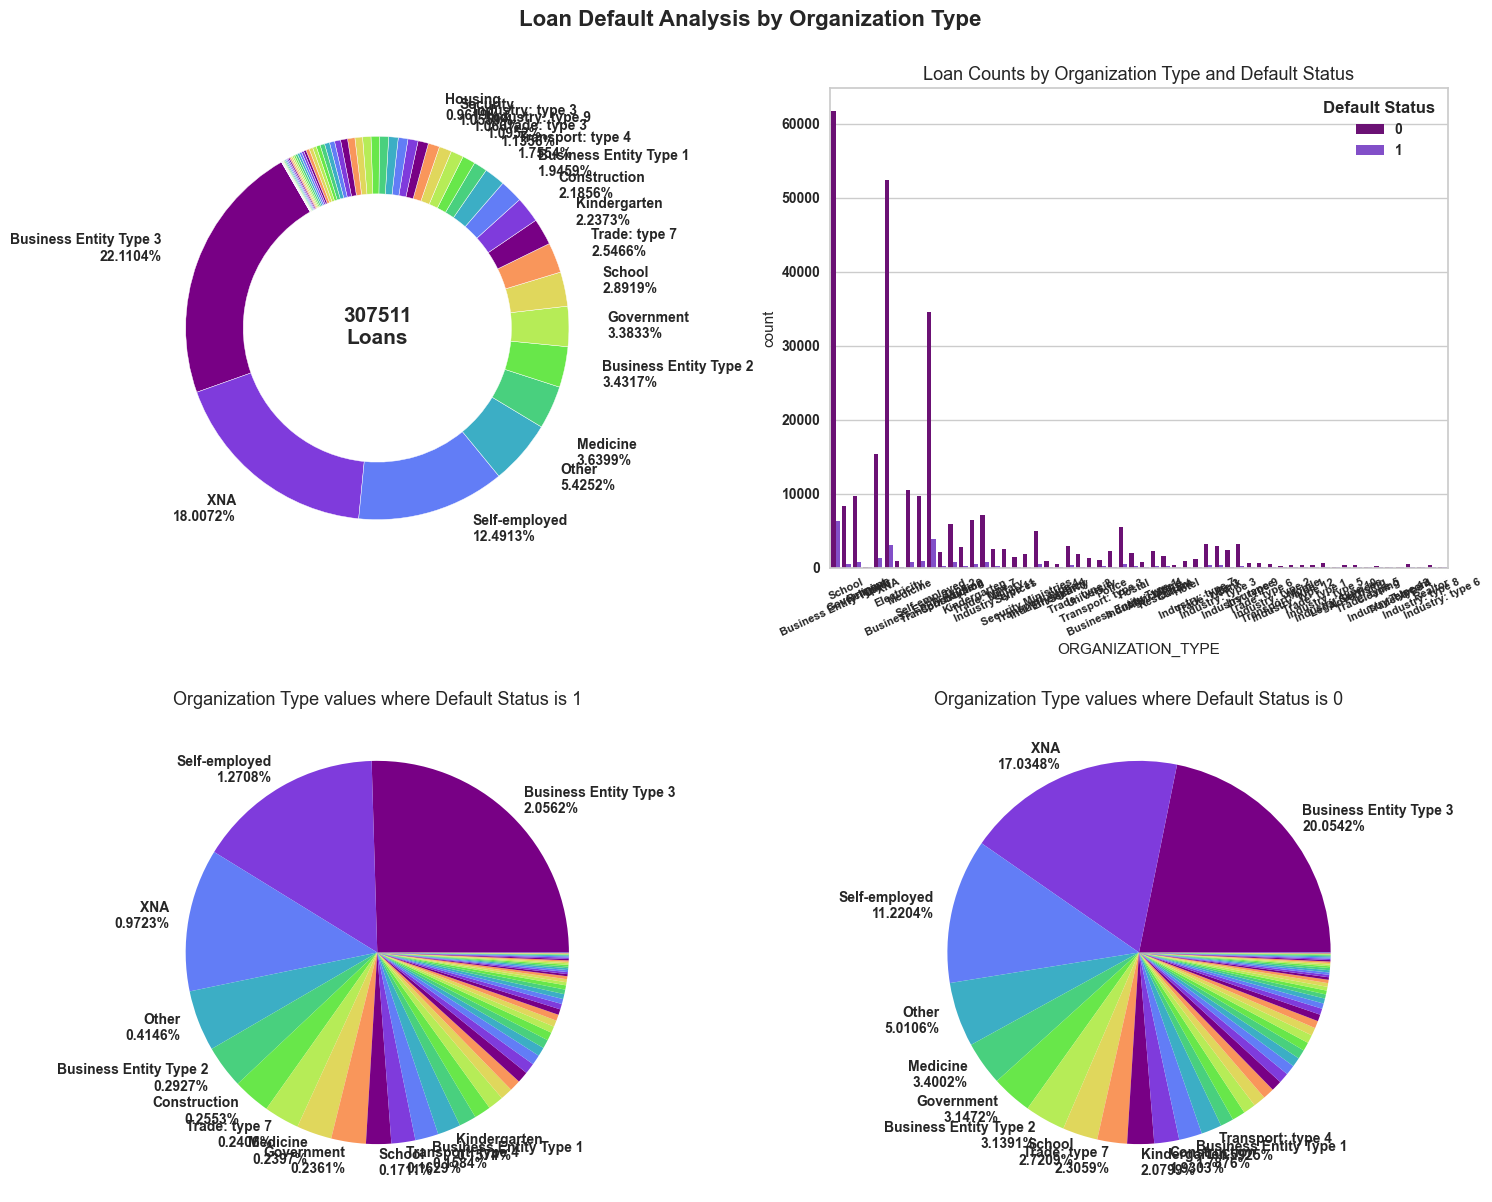

Overall distrubution of ORGANIZATION_TYPE


ORGANIZATION_TYPE  count
0  Business Entity Type 3  67992
1                     XNA  55374
2           Self-employed  38412
3                   Other  16683
4                Medicine  11193

Overall distrubution of ORGANIZATION_TYPE


ORGANIZATION_TYPE where TARGET == 1  count
0              Business Entity Type 3   6323
1                       Self-employed   3908
2                                 XNA   2990
3                               Other   1275
4              Business Entity Type 2    900

Overall distrubution of ORGANIZATION_TYPE


ORGANIZATION_TYPE where TARGET == 0  count
0              Business Entity Type 3  61669
1                                 XNA  52384
2                       Self-employed  34504
3                               Other  15408
4                            Medicine  10456

In [54]:
''' Plotting distribution of ORGANIZATION_TYPE and target values '''
helpers.plot_multiple_plots_two_categorical('ORGANIZATION_TYPE', 'TARGET', 'Organization Type', 'Default Status', df, hide_small_cats=True)

##### CODE_GENDER

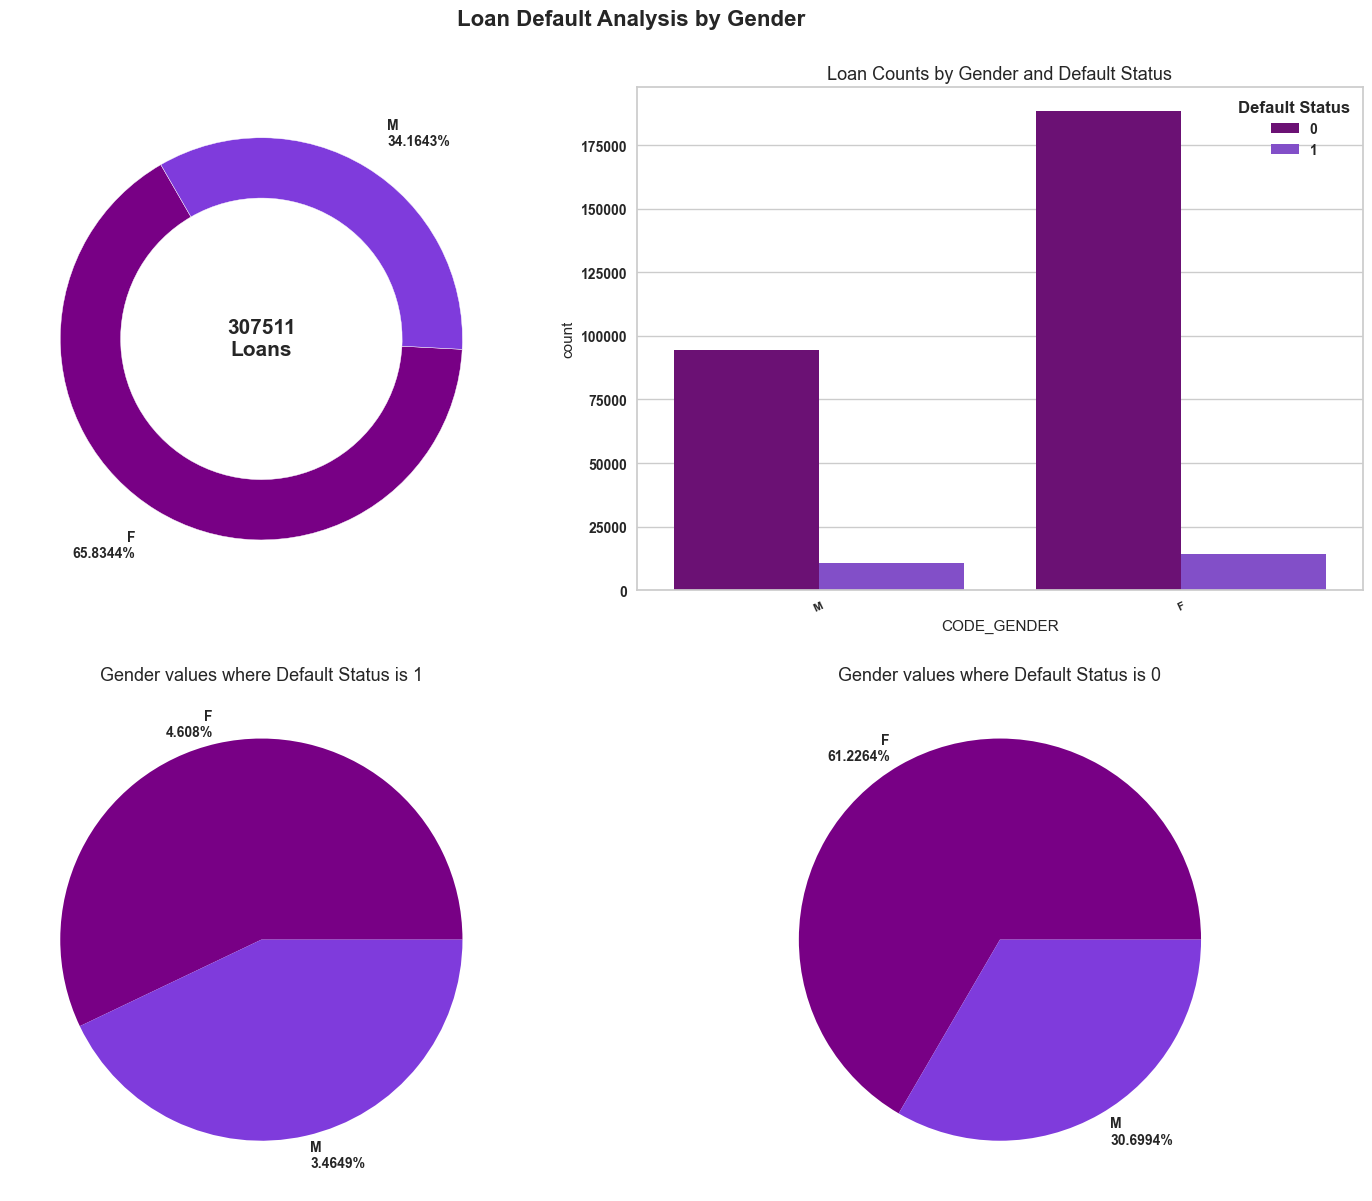

In [55]:
''' Plotting distribution of CODE_GENDER and target values '''
helpers.plot_multiple_plots_two_categorical('CODE_GENDER', 'TARGET', 'Gender', 'Default Status', df)

##### NAME_INCOME_TYPE

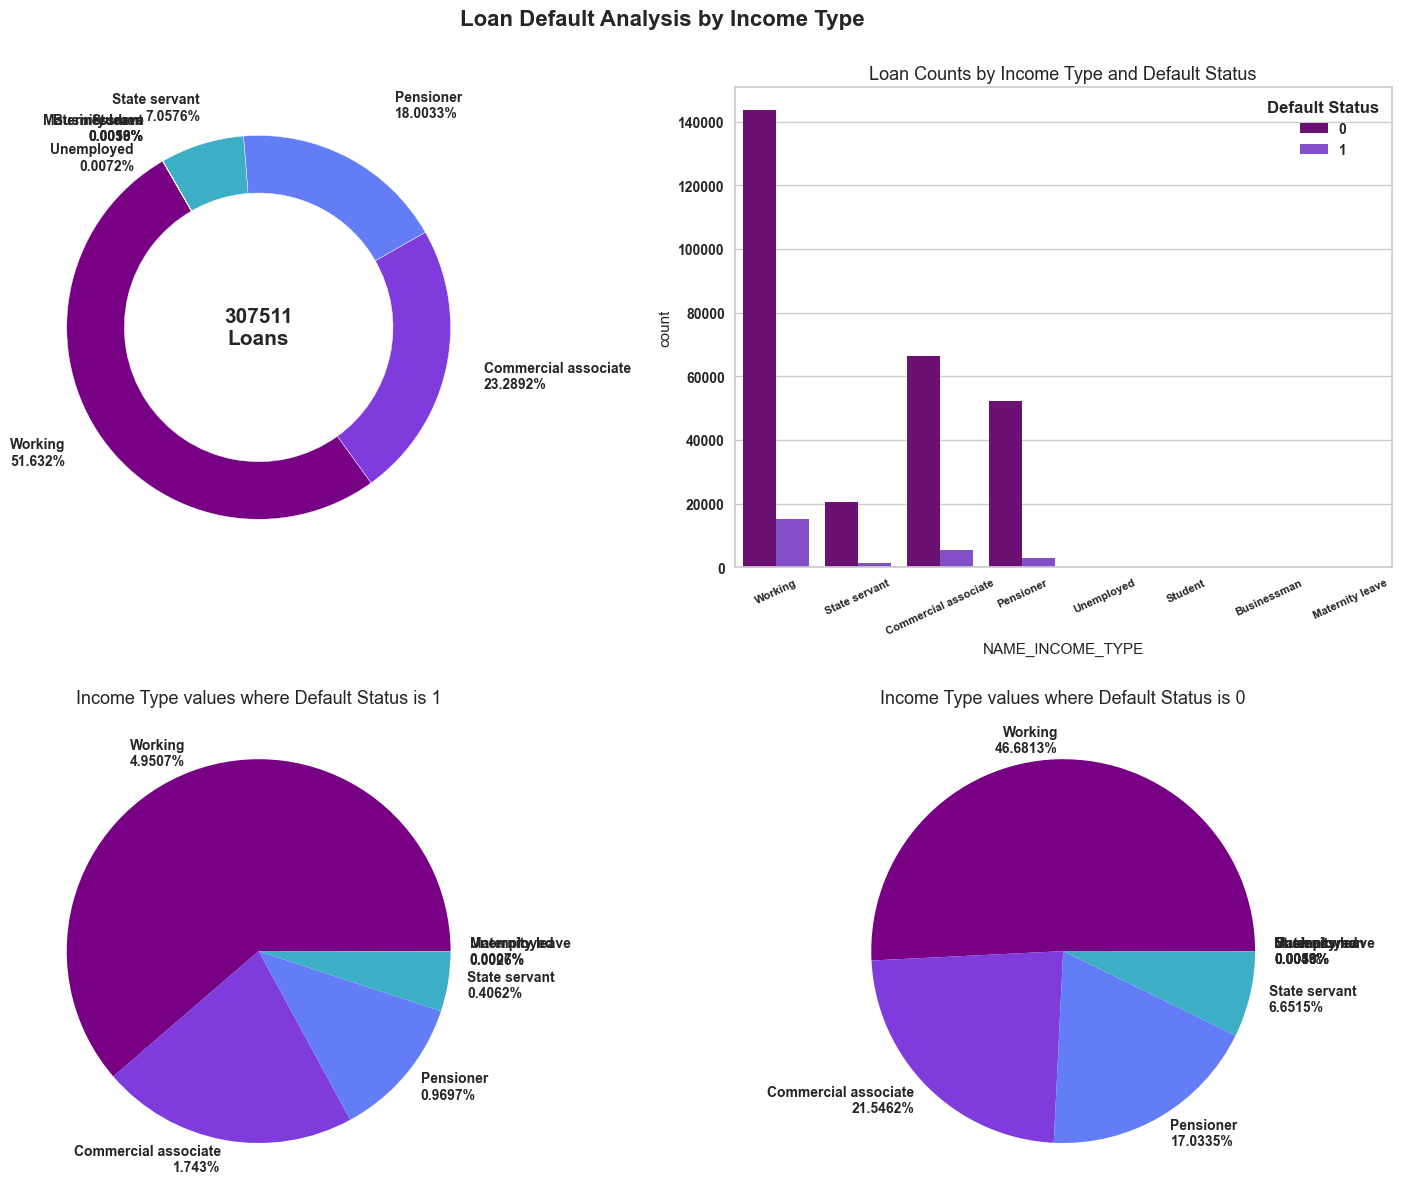

In [56]:
''' Plotting distribution of NAME_INCOME_TYPE and target values '''
helpers.plot_multiple_plots_two_categorical('NAME_INCOME_TYPE', 'TARGET', 'Income Type', 'Default Status', df)

Since all the dataframes that I have read before are connected to our main dataset with applications, I had to join them on the ID columns.

#### Merging with BUREAU data

In [57]:
''' Merging bureau with application dataset '''
bureau_avg = df_bureau.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = df_bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['bureau_' + f_ for f_ in bureau_avg.columns]
df_merged = df_application.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

In [58]:
''' Taking categorical and numerical values of dataset '''
bureau_categorical_cols, bureau_categorical_numerical_cols, bureau_continuous_cols, bureau_binary_cols = helpers.get_all_column_by_types(df_merged, "bureau")

In [59]:
''' Performing ttest with continuous values on bureau dataset '''
df_cols_testing_bureau = helpers.perform_multiple_hypothesis_tests_continuous(df_merged, bureau_continuous_cols, 'TARGET')
print("Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.")
df_cols_testing_bureau = df_cols_testing_bureau.sort_values(by='p-value', ascending=True)
df_cols_testing_bureau

Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.


Column  Mean for Group 1  Mean for Group 2  \
0              bureau_DAYS_CREDIT           -908.41          -1091.45   
10      bureau_DAYS_CREDIT_UPDATE           -438.58           -551.77   
3        bureau_DAYS_ENDDATE_FACT           -868.45           -972.48   
2      bureau_DAYS_CREDIT_ENDDATE           1185.39            596.87   
6           bureau_AMT_CREDIT_SUM         316600.96         385727.97   
8     bureau_AMT_CREDIT_SUM_LIMIT           4708.98           6056.05   
9   bureau_AMT_CREDIT_SUM_OVERDUE            180.27             23.38   
1       bureau_CREDIT_DAY_OVERDUE              1.76              0.87   
4   bureau_AMT_CREDIT_MAX_OVERDUE           7799.73           3846.20   
5       bureau_CNT_CREDIT_PROLONG              0.01              0.01   
12              bureau_buro_count              5.62              5.55   
11             bureau_AMT_ANNUITY          15261.10          13569.68   
7      bureau_AMT_CREDIT_SUM_DEBT         159232.70         156129.42   

    Test Statistic        p-value     Null Hypothesis  
0        33.035769  3.320195e-236            REJECTED  
10       26.104694  5.448025e-149            REJECTED  
3        17.729065   5.236332e-70            REJECTED  
2        16.382600   3.987775e-60            REJECTED  
6       -10.017739   1.356584e-23            REJECTED  
8        -5.190110   2.112685e-07            REJECTED  
9         3.715078   2.034123e-04            REJECTED  
1         2.944014   3.241680e-03            REJECTED  
4         2.204654   2.748625e-02            REJECTED  
5         1.869130   6.161196e-02  could not REJECTED  
12        1.617696   1.057359e-01  could not REJECTED  
11        0.979622   3.272909e-01  could not REJECTED  
7         0.678195   4.976523e-01  could not REJECTED

In [60]:
''' Taking top 6 columns '''
df_top_6_cols_bureau = df_cols_testing_bureau.head(6)
top_6_cols_bureau = np.array(df_top_6_cols_bureau['Column'])
top_6_cols_bureau

array(['bureau_DAYS_CREDIT', 'bureau_DAYS_CREDIT_UPDATE',
       'bureau_DAYS_ENDDATE_FACT', 'bureau_DAYS_CREDIT_ENDDATE',
       'bureau_AMT_CREDIT_SUM', 'bureau_AMT_CREDIT_SUM_LIMIT'],
      dtype=object)

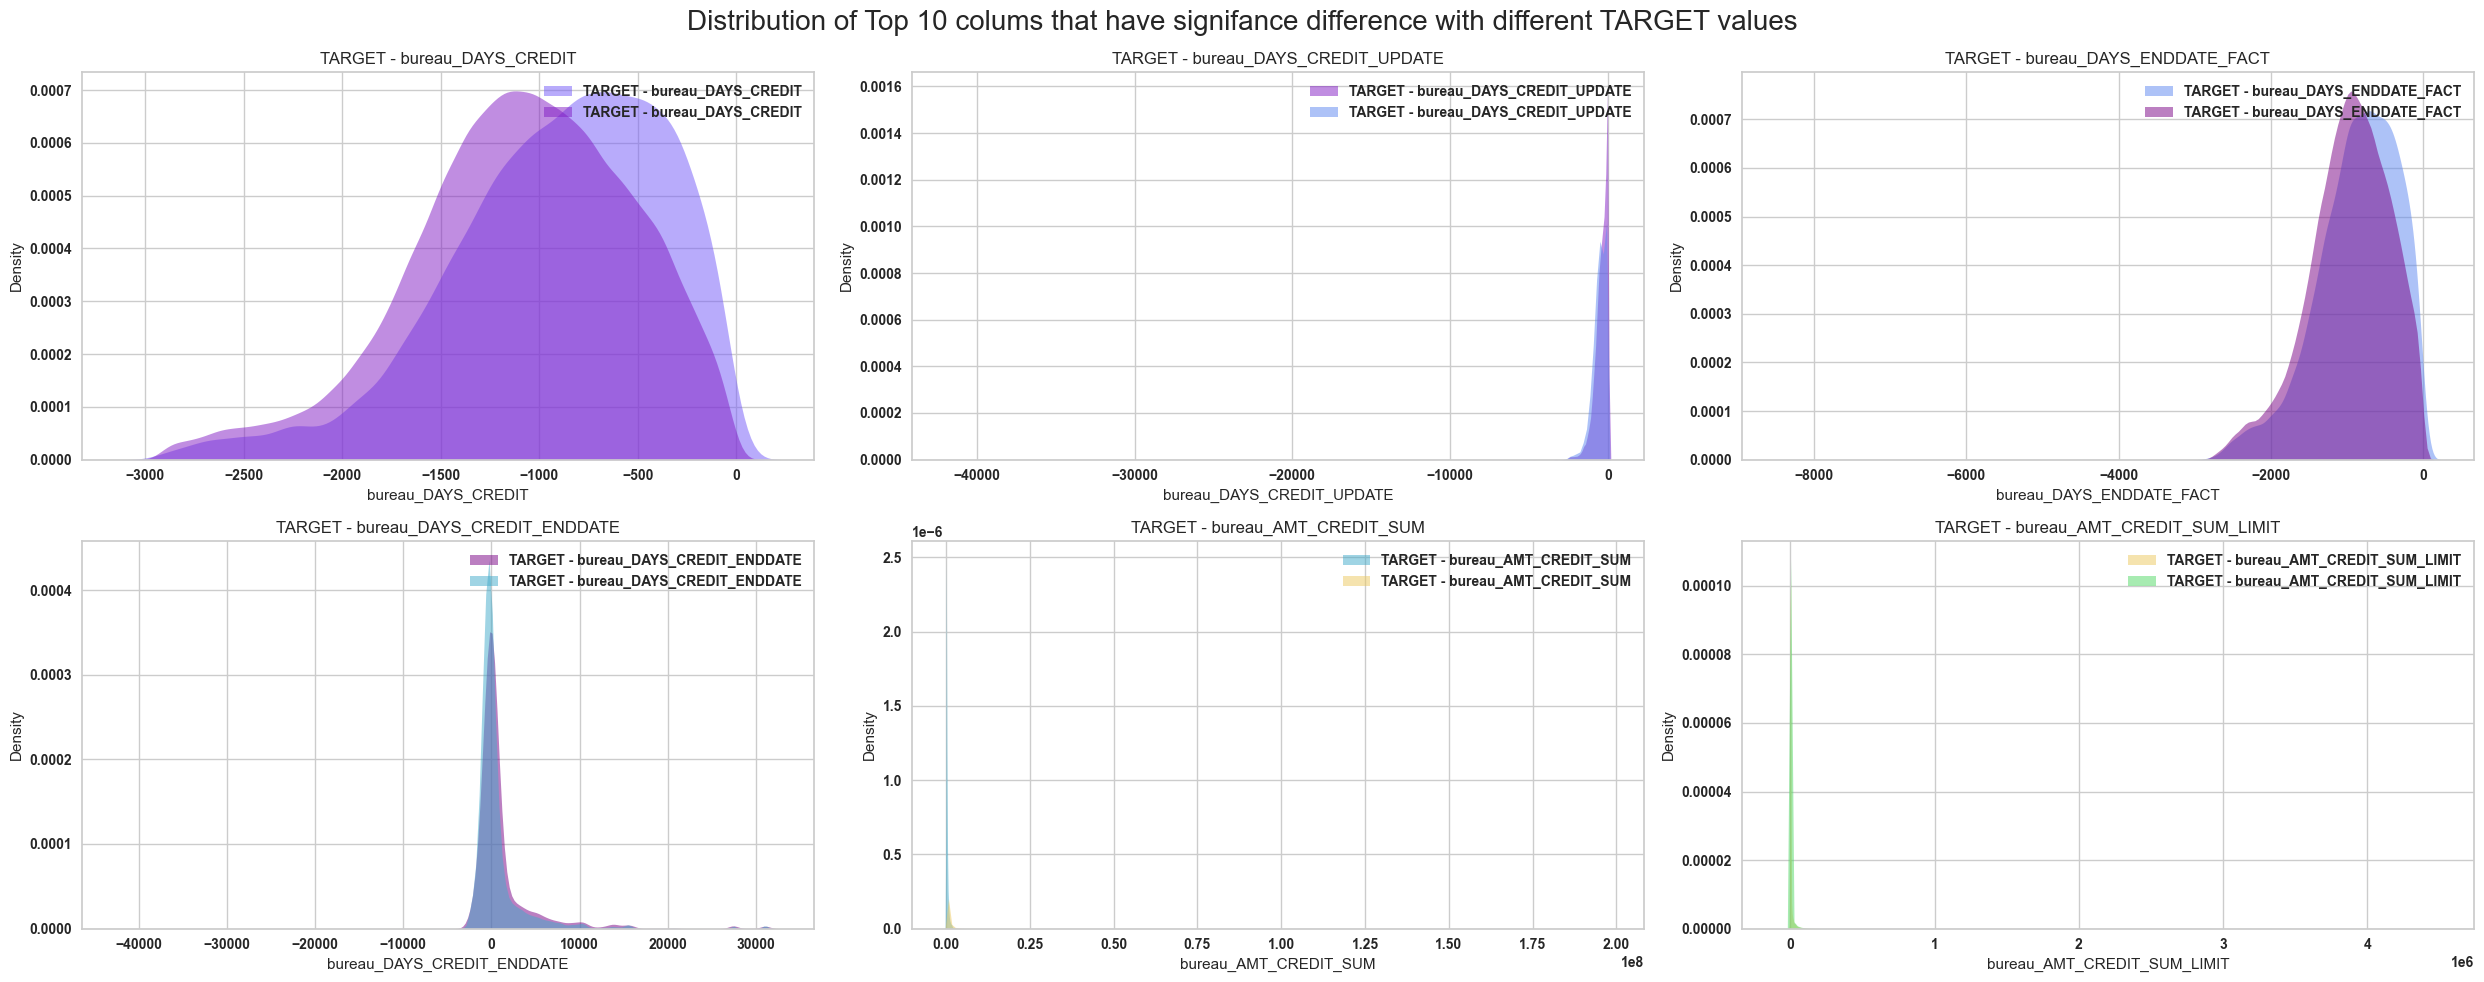

In [61]:
''' plotting top 6 bureau columns'''
helpers.plot_top6_hypothesis_test_cols(df_merged, top_6_cols_bureau, 'TARGET')

#### Previous Application

##### POS Cash Balance

In [62]:
''' Merging POS cash balance with applications dataset '''
pcb_count = df_POS_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
df_POS_balance['SK_ID_PREV'] = df_POS_balance['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])
 
pcb_avg = df_POS_balance.groupby('SK_ID_CURR').mean()
pcb_avg.columns = ['POS_' + f_ if f_ != "SK_ID_PREV" else f_ for f_ in pcb_avg.columns ]
df_merged = df_merged.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')

##### Credit Card Balance

In [63]:
''' Merging credit card balance with applications dataset '''
nb_prevs = df_cc_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
df_cc_balance['SK_ID_PREV'] = df_cc_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
 
avg_cc_bal = df_cc_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['credit_bal_' + f_ for f_ in avg_cc_bal.columns]
df_merged = df_merged.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

##### Installments Payments

In [64]:
''' Merging installments payments dataset '''
cnt_inst = df_installments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
df_installments['SK_ID_PREV'] = df_installments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])
  
avg_inst = df_installments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['inst_payments_' + f_ for f_ in avg_inst.columns]
df_merged = df_merged.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

##### Previous Installments

In [65]:
''' Merging previous installments dataset '''
prev_apps_count = df_prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
df_prev['SK_ID_PREV'] = df_prev['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])
 
prev_apps_avg = df_prev.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['prev_app_' + col for col in prev_apps_avg.columns]
df_merged = df_merged.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

##### POS Columns Testing

In [66]:
''' Taking categorical and numerical values of dataset '''
POS_categorical_cols, POS_categorical_numerical_cols, POS_continuous_cols, _ = helpers.get_all_column_by_types(df_merged, "POS")
all_POS_cat_cols = POS_categorical_cols + POS_categorical_numerical_cols

In [67]:
df_cols_POS = helpers.perform_multiple_hypothesis_tests_continuous(df_merged, POS_continuous_cols, 'TARGET')
print("Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.")
df_cols_POS = df_cols_POS.sort_values(by='p-value', ascending=True)
df_cols_POS.head()

Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.


Column  Mean for Group 1  Mean for Group 2  \
0         POS_MONTHS_BALANCE            -29.50            -31.96   
2  POS_CNT_INSTALMENT_FUTURE              9.79              9.17   
1         POS_CNT_INSTALMENT             15.12             14.67   
4             POS_SK_DPD_DEF              0.50              0.07   
3                 POS_SK_DPD              5.51              3.99   

   Test Statistic       p-value Null Hypothesis  
0       13.272623  3.938233e-40        REJECTED  
2        9.842384  7.777689e-23        REJECTED  
1        6.048962  1.468750e-09        REJECTED  
4        2.879399  3.986129e-03        REJECTED  
3        2.598824  9.357270e-03        REJECTED

In [68]:
df_top_6_cols_POS = df_cols_POS.head(6)
top_6_cols_POS = np.array(df_top_6_cols_POS['Column'])
top_6_cols_POS

array(['POS_MONTHS_BALANCE', 'POS_CNT_INSTALMENT_FUTURE',
       'POS_CNT_INSTALMENT', 'POS_SK_DPD_DEF', 'POS_SK_DPD'], dtype=object)

##### Credit Balance Columns Testing

In [69]:
''' Taking categorical and numerical values of dataset '''
credit_bal_categorical_cols, credit_bal_categorical_numerical_cols, credit_bal_continuous_cols, _ = helpers.get_all_column_by_types(df_merged,
                                                                                                                         "credit_bal")
all_credit_bal_cat_cols = credit_bal_categorical_cols + credit_bal_categorical_numerical_cols

In [70]:
''' Performing hypothesis testing on credit card columns '''
df_cols_credit_bal = helpers.perform_multiple_hypothesis_tests_continuous(df_merged, credit_bal_continuous_cols, 'TARGET')
print("Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.")
df_cols_credit_bal = df_cols_credit_bal.sort_values(by='p-value', ascending=True)
df_cols_credit_bal.head()

Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.


Column  Mean for Group 1  Mean for Group 2  \
21         credit_bal_anomaly_score              0.10              0.07   
1            credit_bal_AMT_BALANCE          67678.32         102318.10   
22              credit_bal_is_fraud              0.13              0.21   
12  credit_bal_AMT_TOTAL_RECEIVABLE          67240.25         101428.29   
11         credit_bal_AMT_RECIVABLE          67238.06         101419.50   

    Test Statistic       p-value Null Hypothesis  
21       19.986840  9.800416e-88        REJECTED  
1       -18.343790  2.382964e-74        REJECTED  
22      -18.226890  1.940832e-73        REJECTED  
12      -18.220444  2.177995e-73        REJECTED  
11      -18.217011  2.315866e-73        REJECTED

In [71]:
''' Taking top 6 credit card columns '''
df_top_6_cols_credit_bal = df_cols_credit_bal.head(6)
top_6_cols_credit_bal = np.array(df_top_6_cols_credit_bal['Column'])
top_6_cols_credit_bal

array(['credit_bal_anomaly_score', 'credit_bal_AMT_BALANCE',
       'credit_bal_is_fraud', 'credit_bal_AMT_TOTAL_RECEIVABLE',
       'credit_bal_AMT_RECIVABLE', 'credit_bal_AMT_RECEIVABLE_PRINCIPAL'],
      dtype=object)

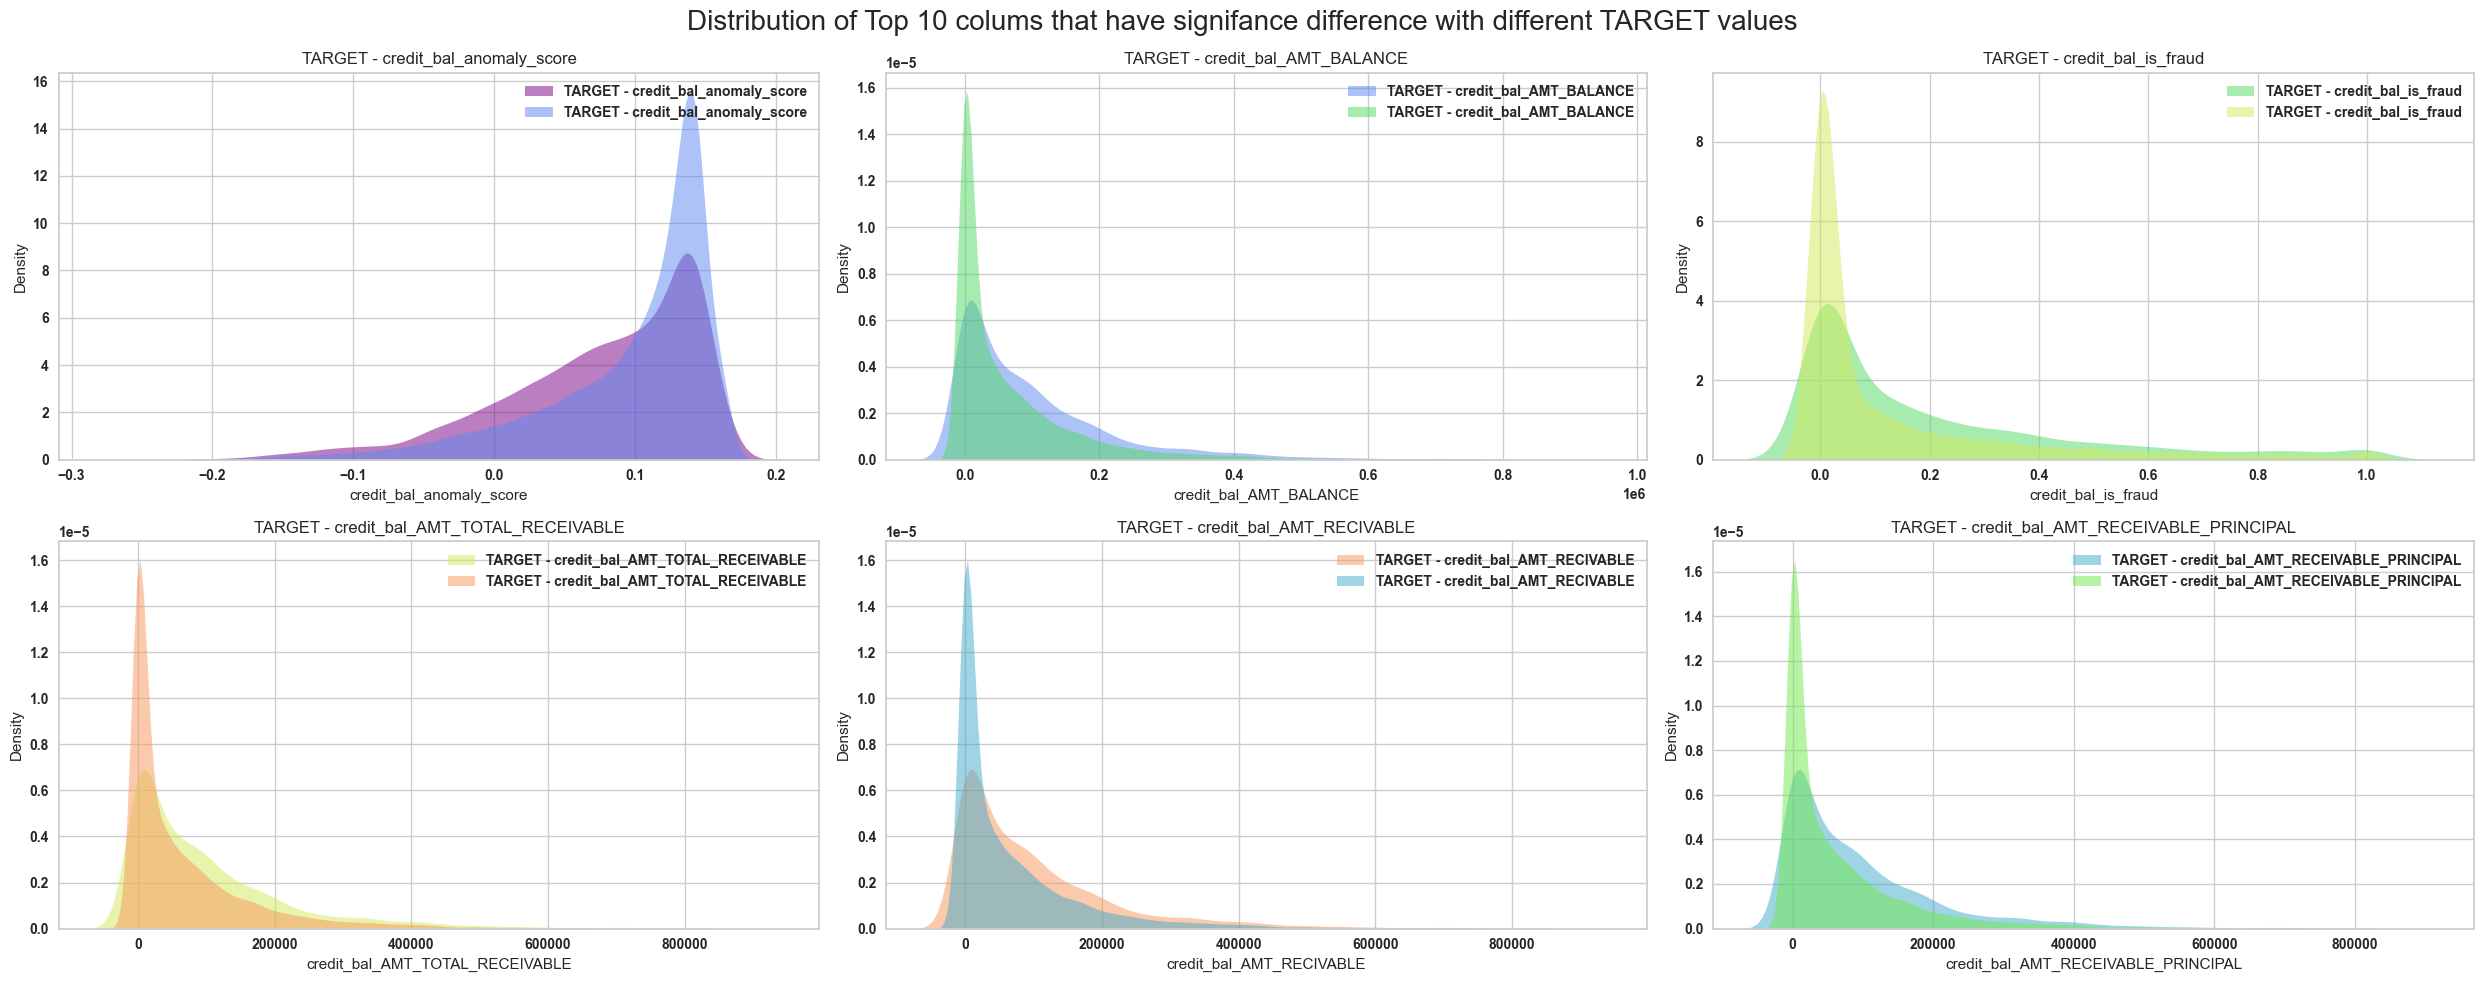

In [72]:
''' Plotting top 6 columns from credit card dataset '''
helpers.plot_top6_hypothesis_test_cols(df_merged, top_6_cols_credit_bal, 'TARGET')

##### Installment Payments Columns Testing

In [73]:
''' Taking categorical and numerical values of dataset '''
inst_payments_categorical_cols, inst_payments_categorical_numerical_cols, inst_payments_continuous_cols, _ = helpers.get_all_column_by_types(df_merged,
                                                                                                                         "inst_payments")
all_inst_payments_cat_cols = inst_payments_categorical_cols + inst_payments_categorical_numerical_cols

In [74]:
''' Performing ttest for continuous installment payment columns '''
df_cols_inst_payments = helpers.perform_multiple_hypothesis_tests_continuous(df_merged, inst_payments_continuous_cols, 'TARGET')
print("Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.")
df_cols_inst_payments = df_cols_inst_payments.sort_values(by='p-value', ascending=True)
df_cols_inst_payments.head()

Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.


Column  Mean for Group 1  Mean for Group 2  \
3      inst_payments_DAYS_ENTRY_PAYMENT           -833.00           -925.10   
2         inst_payments_DAYS_INSTALMENT           -822.46           -912.89   
0  inst_payments_NUM_INSTALMENT_VERSION              0.99              1.05   
5             inst_payments_AMT_PAYMENT          16806.39          19045.87   
4          inst_payments_AMT_INSTALMENT          16953.85          18772.87   

   Test Statistic       p-value Null Hypothesis  
3       16.752084  8.268965e-63        REJECTED  
2       16.441994  1.405282e-60        REJECTED  
0      -11.597343  4.678700e-31        REJECTED  
5      -10.177258  2.652607e-24        REJECTED  
4       -8.492035  2.088061e-17        REJECTED

In [75]:
''' Taking top 6 best columns '''
df_top_6_cols_inst_payments = df_cols_inst_payments.head(6)
top_6_cols_inst_payments = np.array(df_top_6_cols_inst_payments['Column'])
top_6_cols_inst_payments

array(['inst_payments_DAYS_ENTRY_PAYMENT',
       'inst_payments_DAYS_INSTALMENT',
       'inst_payments_NUM_INSTALMENT_VERSION',
       'inst_payments_AMT_PAYMENT', 'inst_payments_AMT_INSTALMENT',
       'inst_payments_NUM_INSTALMENT_NUMBER'], dtype=object)

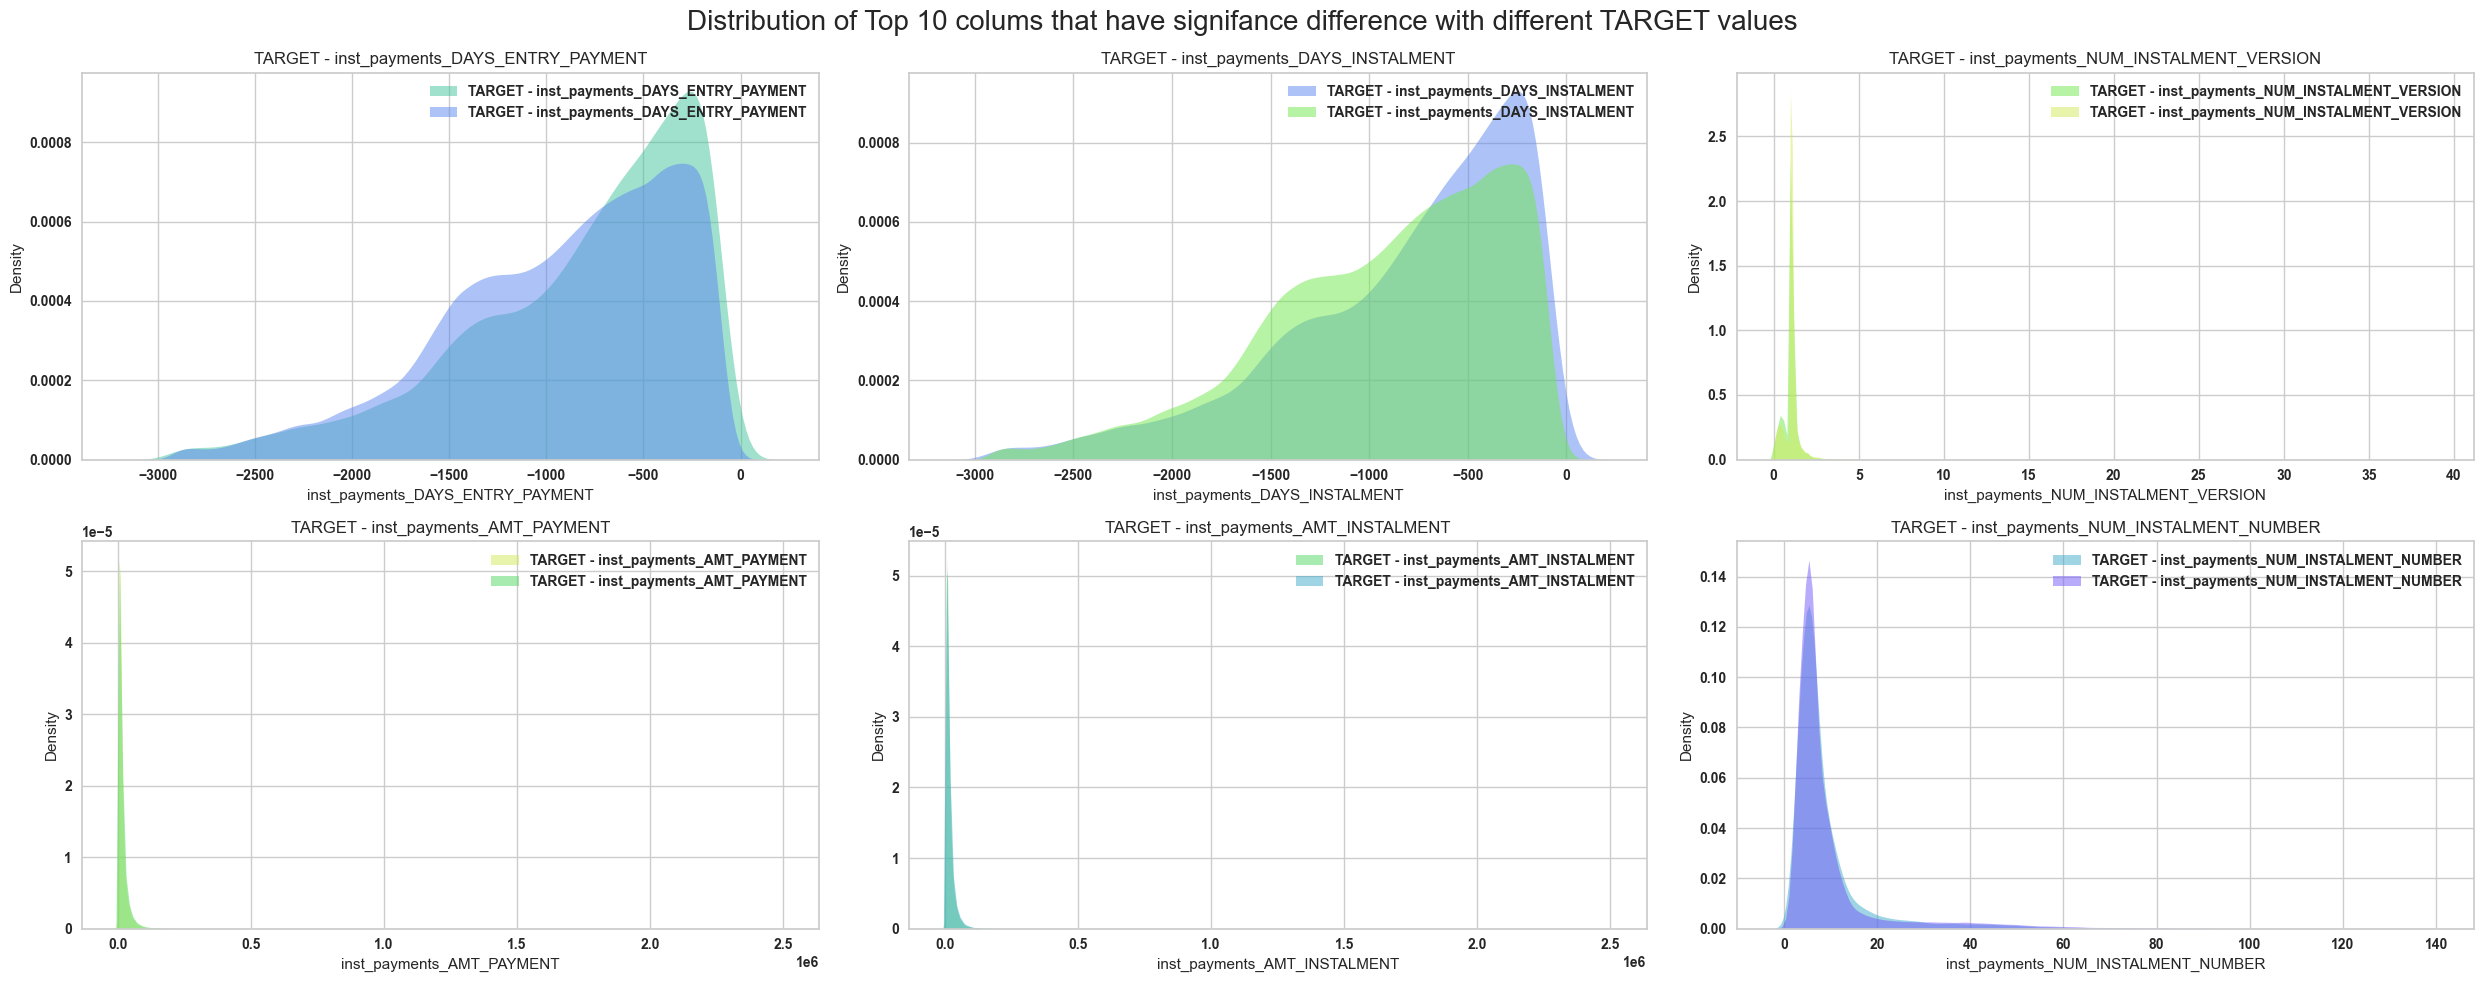

In [76]:
''' Plotting selected top 6 columns '''
helpers.plot_top6_hypothesis_test_cols(df_merged, top_6_cols_inst_payments, 'TARGET')

##### Prev Application Columns Testing

In [77]:
''' Taking categorical and numerical values of dataset '''
prev_app_categorical_cols, prev_app_categorical_numerical_cols, prev_app_continuous_cols, _ = helpers.get_all_column_by_types(df_merged, "prev_app")
all_prev_app_cat_cols = prev_app_categorical_cols + prev_app_categorical_numerical_cols

In [78]:
''' Performing ttest for prev application columns '''
df_cols_prev_app = helpers.perform_multiple_hypothesis_tests_continuous(df_merged, prev_app_continuous_cols, 'TARGET')
print("Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.")
df_cols_prev_app = df_cols_prev_app.sort_values(by='p-value', ascending=True)
df_cols_prev_app.head()

Performing hypothesis testing with ttest for numerical values and different groups of TARGET value.


Column  Mean for Group 1  Mean for Group 2  \
10            prev_app_DAYS_DECISION           -828.93           -928.79   
13       prev_app_DAYS_FIRST_DRAWING         334039.03         344079.53   
5   prev_app_HOUR_APPR_PROCESS_START             12.33             12.69   
0               prev_app_AMT_ANNUITY          13364.18          14603.60   
7         prev_app_RATE_DOWN_PAYMENT              0.07              0.08   

    Test Statistic       p-value Null Hypothesis  
10       19.066629  9.562741e-81        REJECTED  
13      -18.083311  7.581965e-73        REJECTED  
5       -14.334858  1.656008e-46        REJECTED  
0       -14.234989  6.903666e-46        REJECTED  
7       -13.249349  5.430026e-40        REJECTED

In [79]:
''' Taking top 6 best previous application columns '''
df_top_6_cols_prev_app = df_cols_prev_app.head(6)
top_6_cols_prev_app = np.array(df_top_6_cols_prev_app['Column'])
top_6_cols_prev_app

array(['prev_app_DAYS_DECISION', 'prev_app_DAYS_FIRST_DRAWING',
       'prev_app_HOUR_APPR_PROCESS_START', 'prev_app_AMT_ANNUITY',
       'prev_app_RATE_DOWN_PAYMENT', 'prev_app_DAYS_LAST_DUE_1ST_VERSION'],
      dtype=object)

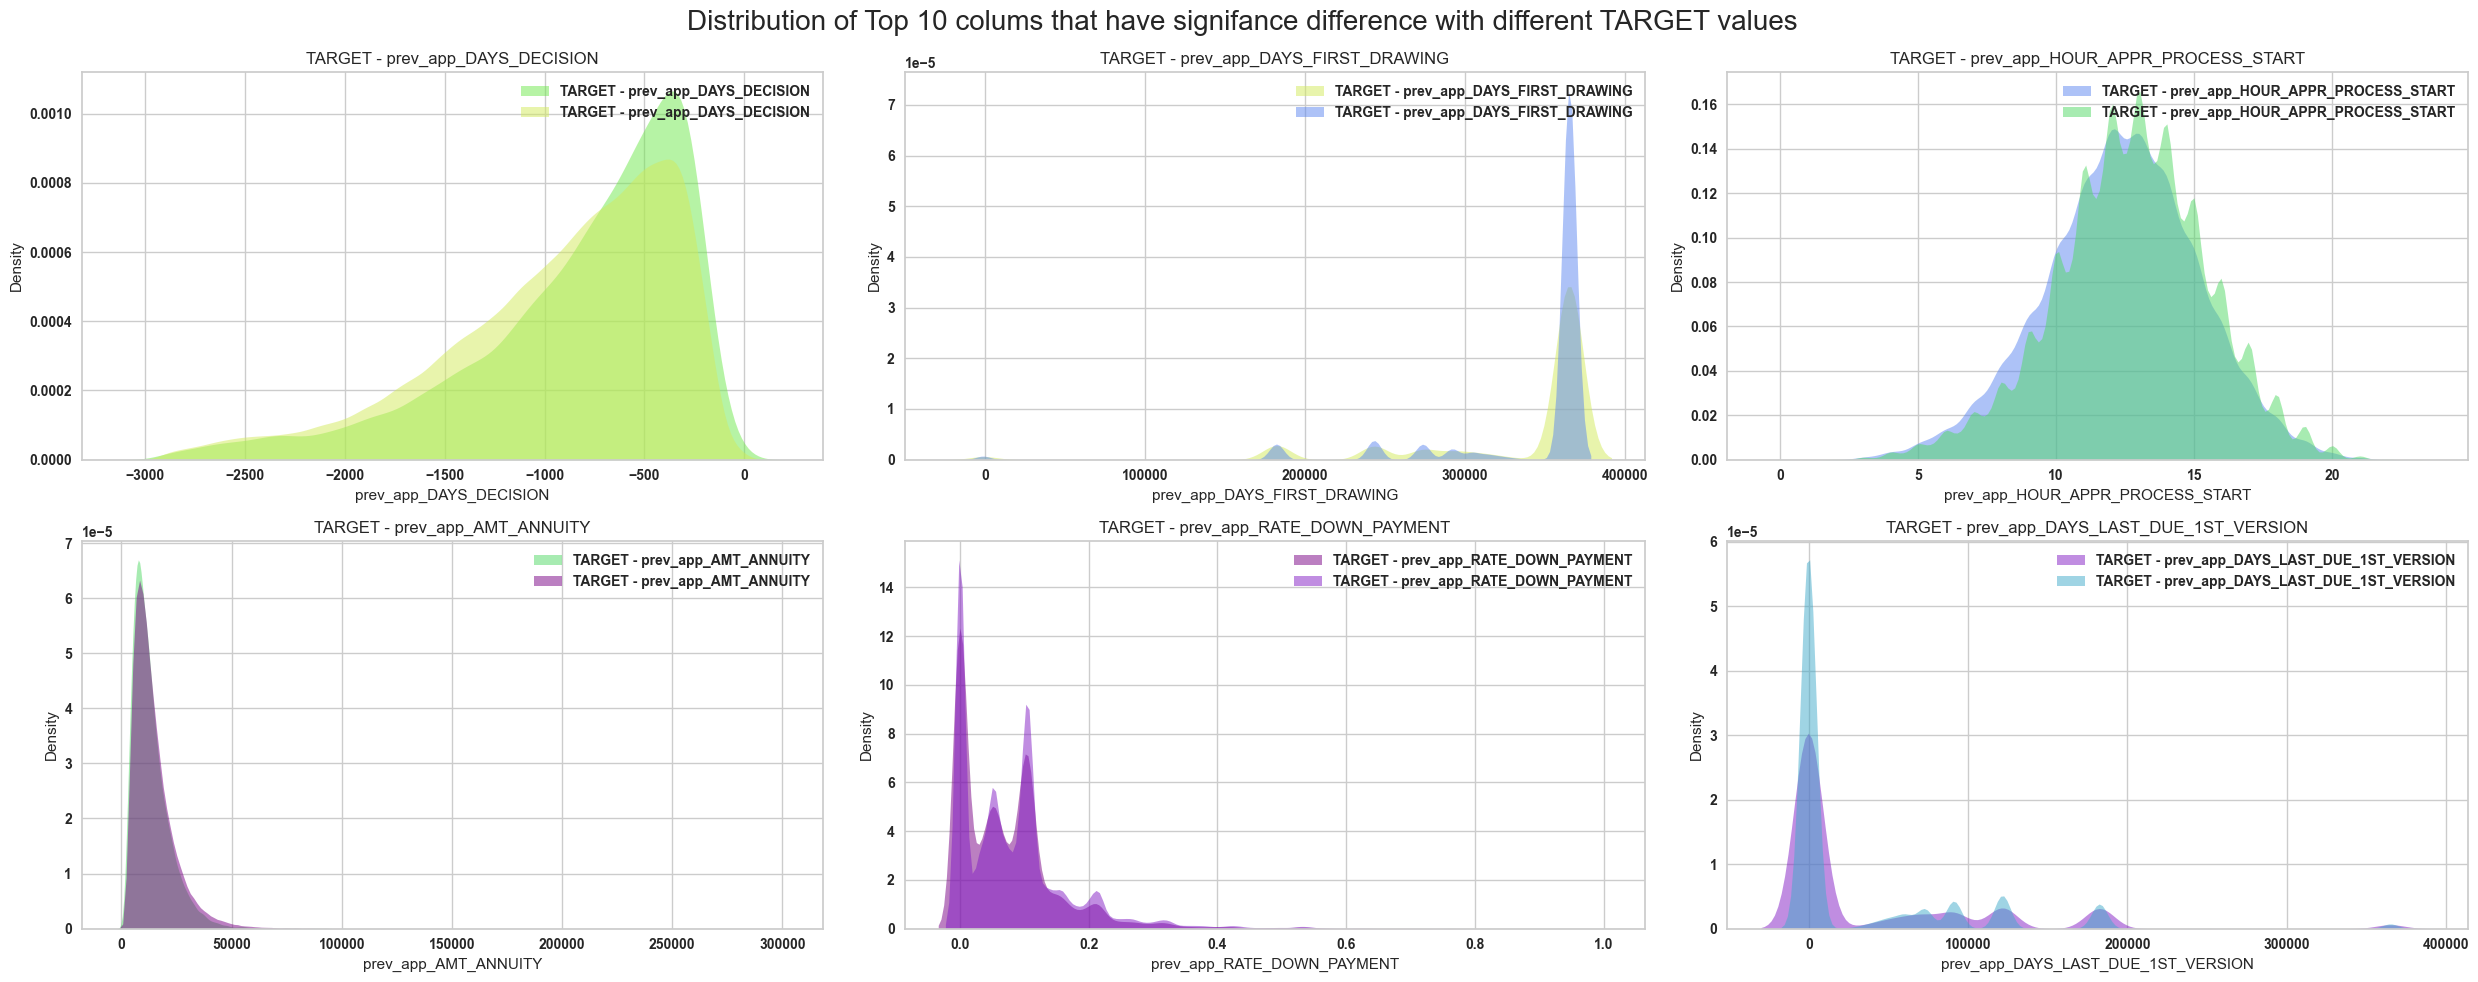

In [80]:
''' Plotting top 6 columns '''
helpers.plot_top6_hypothesis_test_cols(df_merged, top_6_cols_prev_app, 'TARGET')

In [83]:
''' Setting up final model '''
df_final_application = df_merged.copy()

### Final Feature Selection

#### Mutual Information

First, I conduct mutual information calculations on each of the columns and visualize the results through plotting. This allows me to identify the columns that exhibit the highest significance in relation to the target value.

1. REGION_RATING_CLIENT: This feature represents the rating of the region where the client lives. It has a mutual information score of 0.257319, indicating a significant influence on the classification task. The rating of the region may be associated with the client's socio-economic background or other factors that impact loan repayment capabilities.

2. REGION_RATING_CLIENT_W_CITY: This feature represents the rating of the region where the client lives, considering the city as well. It has the same mutual information score as REGION_RATING_CLIENT (0.257319), suggesting that it provides similar information and relevance to the classification. It incorporates the city element into the regional rating.

3. DAYS_EMPLOYED: This feature represents the number of days the client has been employed. It has a mutual information score of 0.257319, indicating a strong influence on the classification. The length of employment is likely to be correlated with the client's ability to repay loans or meet financial obligations.

4. DAYS_BIRTH: This feature represents the number of days since the client's birth. It has a mutual information score of 0.257319, suggesting a significant influence on the classification. The client's age may be an important factor in determining loan repayment capabilities or financial stability.

5. OCCUPATION_TYPE: This feature represents the type of occupation of the client. It has a mutual information score of 0.158298, indicating a moderate level of relevance to the classification task. The occupation type may provide insights into the client's income level, stability, and loan repayment capabilities.

6. HOUR_APPR_PROCESS_START: This feature represents the hour of the day when the application process started. It has a mutual information score of 0.120923, suggesting a moderate influence on the classification. The timing of the application may be correlated with certain patterns or factors relevant to loan approval or rejection.

7. WEEKDAY_APPR_PROCESS_START: This feature represents the day of the week when the application process started. It has the same mutual information score as HOUR_APPR_PROCESS_START (0.120923), indicating a similar level of relevance. The day of the week may provide additional insights into patterns or factors impacting loan classification.

8. CNT_CHILDREN: This feature represents the number of children the client has. It has a mutual information score of 0.096651, suggesting a moderate level of relevance. The number of children may impact the client's financial responsibilities and loan repayment capacity.

9. ORGANIZATION_TYPE: This feature represents the type of organization where the client is employed. It has a mutual information score of 0.078603, indicating a mild influence on the classification. Different types of organizations may have different probabilities of being classified into specific loan categories.

10. NAME_EDUCATION_TYPE: This feature represents the client's education level. It has a mutual information score of 0.064221, suggesting a relatively weaker influence compared to previous features. The education level may provide some insights into the client's qualifications and potential financial stability.

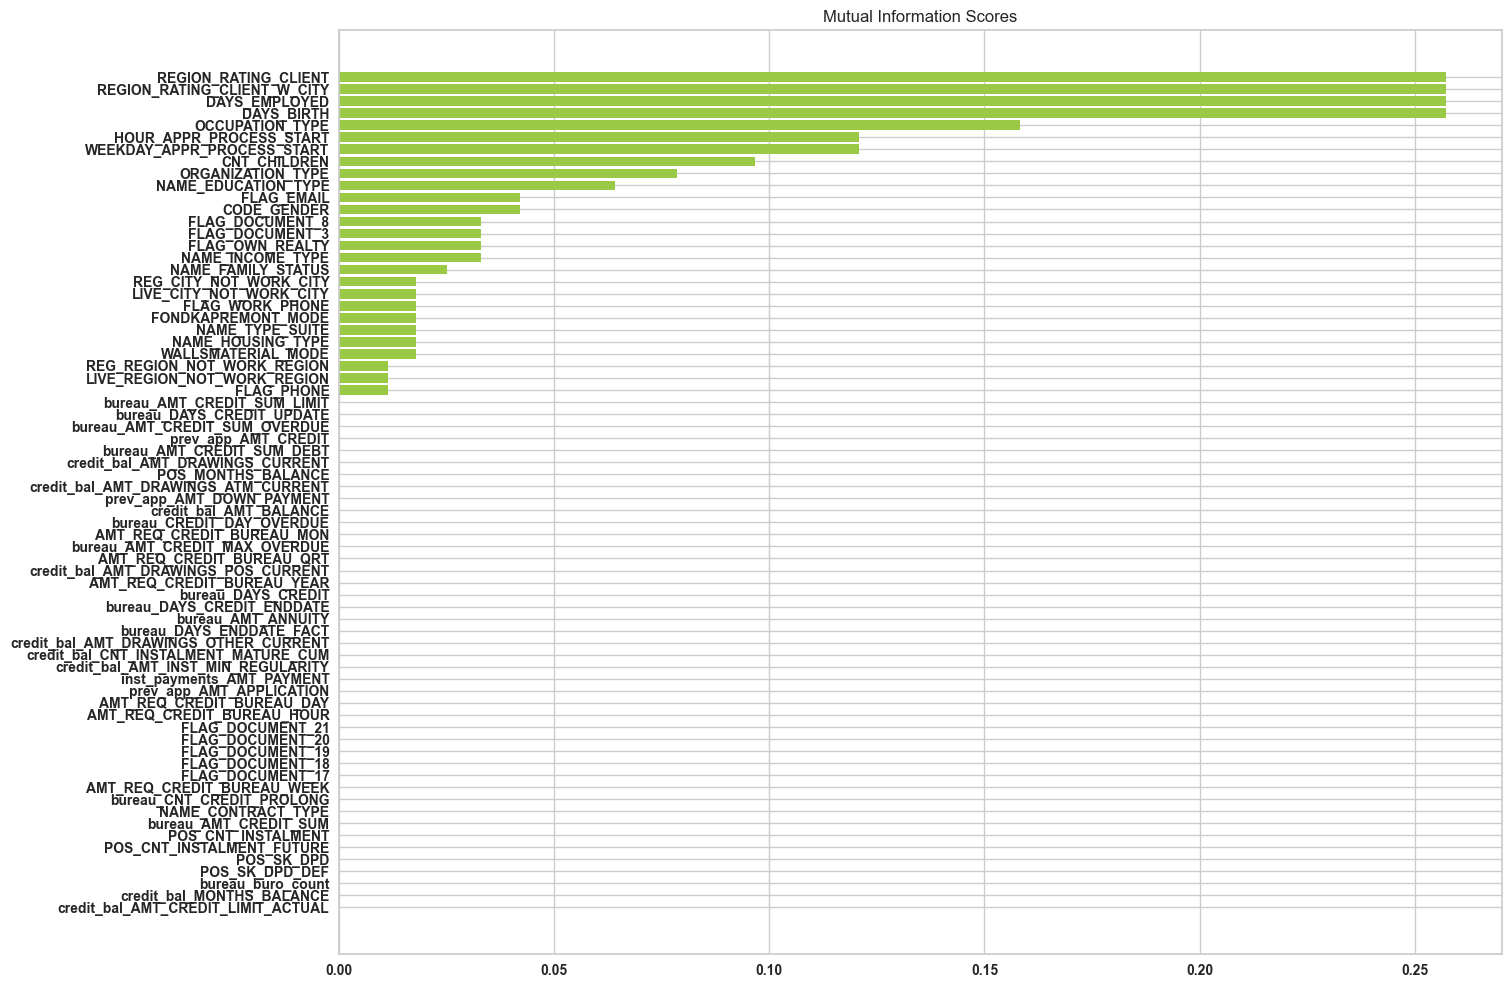

REGION_RATING_CLIENT           0.257319
REGION_RATING_CLIENT_W_CITY    0.257319
DAYS_EMPLOYED                  0.257319
DAYS_BIRTH                     0.257319
OCCUPATION_TYPE                0.158298
HOUR_APPR_PROCESS_START        0.120923
WEEKDAY_APPR_PROCESS_START     0.120923
CNT_CHILDREN                   0.096651
ORGANIZATION_TYPE              0.078603
NAME_EDUCATION_TYPE            0.064221
Name: MI Scores, dtype: float64

In [84]:
''' Plotting mutual information and displaying top 10 columns '''
df = df_final_application[[col for col in df_final_application.columns if col != "TARGET" and "_ID_" not in col]].copy()
df_target = df_final_application[['TARGET']]
mi_scores = helpers.get_and_plot_mi_scores(df, df_target, 'TARGET')
mi_scores[:10]

#### Removing too correlated features

Subsequently, as part of my analysis, I proceed to identify continuous features that exhibit high correlation and implement a strategy to handle this redundancy. Specifically, I selectively remove one feature from each pair of highly correlated continuous features, opting to retain the feature that possesses a higher mutual information score. This step allows me to mitigate the effects of multicollinearity and ensure that the remaining features retain their utmost relevance to the target variable.

In [85]:
''' Getting columns by type '''
categorical_cols, categorical_numerical_cols, continuous_cols, binary_cols = helpers.get_all_column_by_types(df_final_application) 

In [86]:
''' Printing out too correlated columns and leaving only good ones '''
to_drop = helpers.get_too_correlated_cols(df_final_application, continuous_cols, mi_scores)

AMT_GOODS_PRICE and AMT_CREDIT are highly correlated: 0.987. The column dropped will be AMT_GOODS_PRICE.
APARTMENTS_MODE and APARTMENTS_AVG are highly correlated: 0.973. The column dropped will be APARTMENTS_MODE.
BASEMENTAREA_MODE and BASEMENTAREA_AVG are highly correlated: 0.973. The column dropped will be BASEMENTAREA_MODE.
YEARS_BEGINEXPLUATATION_MODE and YEARS_BEGINEXPLUATATION_AVG are highly correlated: 0.972. The column dropped will be YEARS_BEGINEXPLUATATION_MODE.
YEARS_BUILD_MODE and YEARS_BUILD_AVG are highly correlated: 0.989. The column dropped will be YEARS_BUILD_MODE.
COMMONAREA_MODE and COMMONAREA_AVG are highly correlated: 0.977. The column dropped will be COMMONAREA_MODE.
ELEVATORS_MODE and ELEVATORS_AVG are highly correlated: 0.979. The column dropped will be ELEVATORS_MODE.
ENTRANCES_MODE and ENTRANCES_AVG are highly correlated: 0.978. The column dropped will be ENTRANCES_MODE.
FLOORSMAX_MODE and FLOORSMAX_AVG are highly correlated: 0.986. The column dropped will be 

In [87]:
''' Dropping too correlated features'''
to_drop = [col for col in to_drop if col not in ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
print(f"Dropping {len(to_drop)} number of too correlated numerical features.")
df_too_corr_dropped = df_final_application.drop(to_drop, axis=1)

Dropping 60 number of too correlated numerical features.


In [88]:
''' Taking columns by column type '''
categorical_cols, categorical_numerical_cols, continuous_cols, binary_cols = helpers.get_all_column_by_types(df_too_corr_dropped) 

#### Taking top most correlated numerical features

After completing the aforementioned process, I proceed to conduct a Pearson correlation analysis. This analysis involves calculating the correlation coefficients between the remaining features and the target variable. Subsequently, I identify and select the top positively correlated features, as well as the top 10 negatively correlated features, based on their respective correlation scores. This step enables me to further refine the feature set by prioritizing those features that exhibit a strong positive or negative relationship with the target variable.

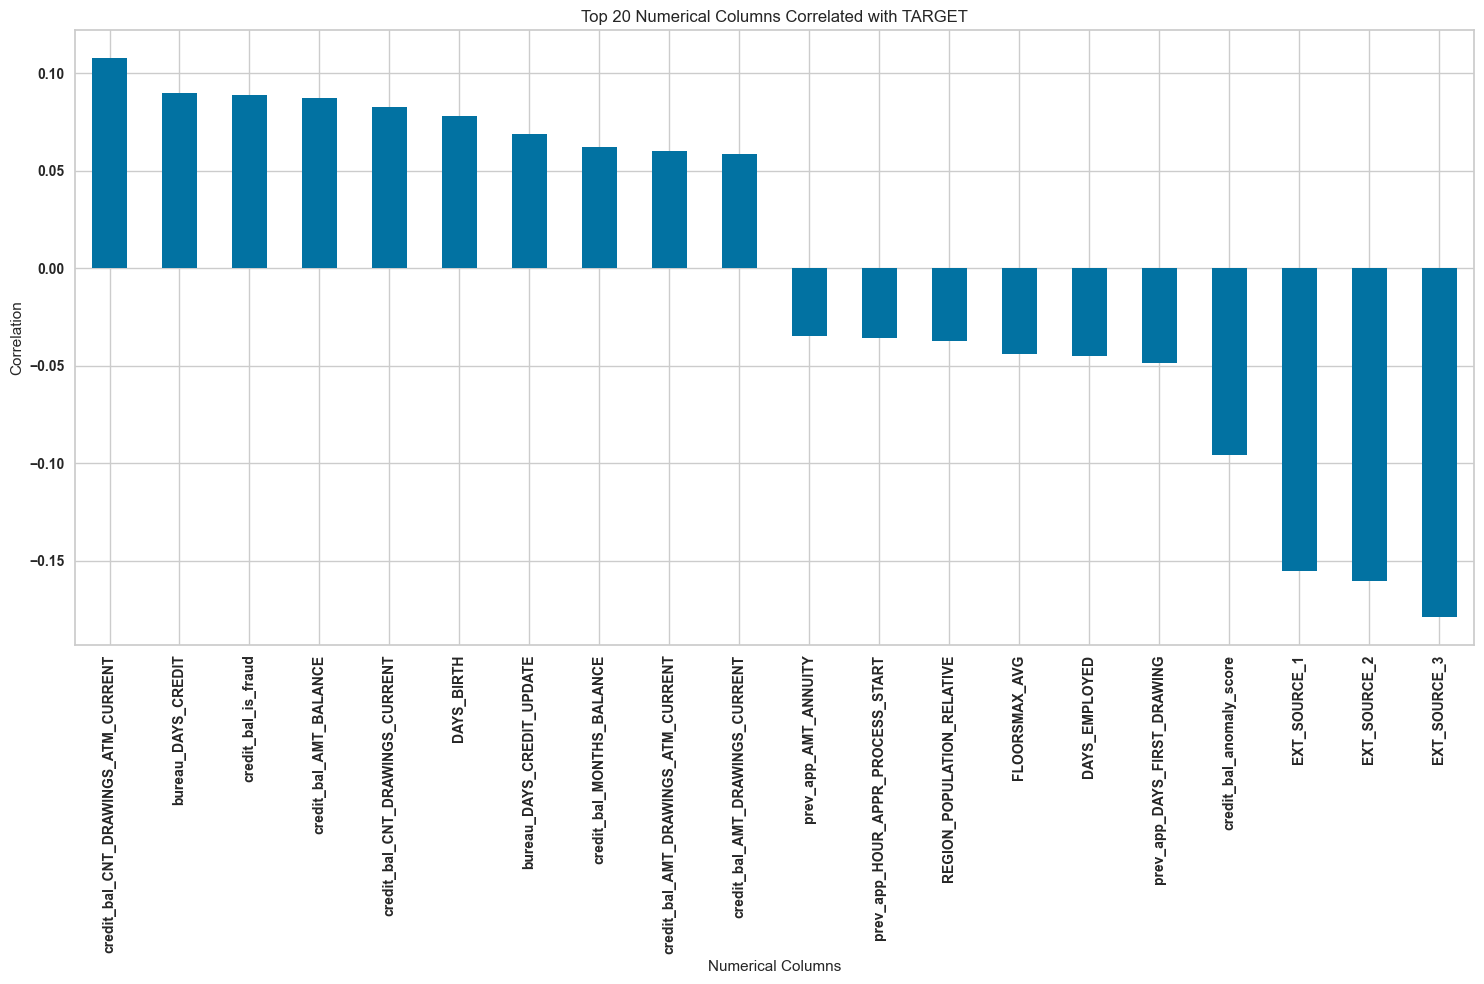

In [89]:
''' Plotting and taking top 20 columns from continuous list '''
top_20_continuous_cols = helpers.get_20_top_correlated_features_with_target(df_too_corr_dropped, continuous_cols)
top_20_continuous_cols.extend(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH'])
top_20_continuous_cols = list(set(top_20_continuous_cols))

In [90]:
''' Taking columns by column type '''
categorical_cols, categorical_numerical_cols, continuous_cols, binary_cols = helpers.get_all_column_by_types(df_too_corr_dropped) 

In [91]:
''' Creating new instance of dataframe for further feature analysis '''
df_feat_eng = df_too_corr_dropped.copy()

Then I also take features that had highest score in mutual information

In [92]:
''' Taking top mutual information columns '''
high_mi_score_cols = [key for key, val in mi_scores.items() if val > 0.025 if val not in top_20_continuous_cols]

In [93]:
''' Taking sample for FeatureSelector '''
df = df_feat_eng.sample(10000, random_state=42).copy()
y_feat_select = list(df['TARGET'])
imputed_array = SimpleImputer(strategy='mean').fit_transform(df[continuous_cols])
df_feat_select = pd.DataFrame(imputed_array, columns=continuous_cols)
df_feat_select = df_feat_select.reset_index() 

Following the previous steps, I leverage a function from the FeatureSelector autofeat module to perform an additional round of selection for continuous columns. This function utilizes automated feature engineering techniques to intelligently identify and include only the most relevant continuous columns for further analysis. By employing this method, I enhance the precision of feature selection, ensuring that only the most informative continuous columns are retained for subsequent stages of the analysis.

In [94]:
""" Getting important features with autofeat FeatureSelector """
fsel = FeatureSelector(problem_type="classification", keep=top_20_continuous_cols, verbose=0, n_jobs=-1)
fselector_features = fsel.fit_transform(df_feat_select, y_feat_select)

We can now see that we have only 36 numerical columns left.

In [95]:
''' Taking final numerical columns '''
selected_numerical_cols = list(set(fselector_features))  
selected_numerical_cols = [col for col in selected_numerical_cols if col in df.columns]
number_of_num_cols = len(selected_numerical_cols)
print(f"Selected number of numerical columns: {number_of_num_cols}")

Selected number of numerical columns: 43


Then I perform chi squared contingency test to take best categorical columns

In [96]:
''' Taking best categorical columns '''
selected_cat_cols = helpers.select_best_categorical_features(df, categorical_cols + binary_cols + categorical_numerical_cols, 'TARGET')
selected_cat_cols = list(set(selected_cat_cols))

Now I have the final set of columns which I will use for prediction.

In [97]:
''' Taking final set of columns '''
final_features = selected_numerical_cols + selected_cat_cols + high_mi_score_cols + ['TARGET']
final_features = list(set(final_features))
print(f"Selected number of final features columns: {len(final_features)}") 

Selected number of final features columns: 70


In [142]:
''' Reading clustering models '''
with open('final_application_preprocessor.pkl', 'rb') as file:
    final_preprocessor = pickle.load(file)

with open('cluster_assigner.pkl', 'rb') as file:
    cluster_assigner = pickle.load(file)
 
encoder_model = keras.models.load_model("encoder_model.h5")

The code below splits a dataset into training and validation sets. Here's a summary:

* It samples 80,000 rows randomly from the dataset.
* Creates a new DataFrame with selected features and converts the 'TARGET' column to integer type.
* Splits the features and target into training (X_train, y_train) and validation (X_test, y_test) sets using a 70:30 ratio.
* Converts the column names of the training and validation features to strings.

In [147]:
''' Splitting dataset into train and validation '''
df = df_feat_eng.sample(80000, random_state=42).copy()

df_final_application_sampled = df[final_features].copy()
df_final_application_sampled['TARGET'] = df_final_application_sampled['TARGET'].astype(int)

features = df_final_application_sampled.drop('TARGET', axis=1)
target = df_final_application_sampled['TARGET']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, stratify=target)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [148]:
''' Taking missing columns that were used in clustering '''
missing_columns = helpers.get_missing_cols_from_application_cleaner(final_preprocessor, final_features)

In [149]:
''' Taking columns sets for imputing '''
set_of_final_features = set(final_features)
fill_by_None = list({'OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FONDKAPREMONT_MODE'}.intersection(set_of_final_features))
replace_by_zero = list(set(helpers.known_replace_by_zero_cols).intersection(set_of_final_features))
fill_Missing = [col for col in X_train.columns if "missing" in list(X_train[col].unique())]

In [150]:
''' Extending replace_by_zero '''
replace_by_zero = list(set([col for col in df_final_application_sampled.columns if (col in continuous_cols or col in categorical_numerical_cols) and
                          (col.endswith("MEDI") or col.endswith("MODE") or col.endswith("AVG"))]))

In [196]:
''' Taking final preprocessor '''
final_preprocessor = helpers.get_final_application_preprocessor_pipeline(helpers.get_application_cleaner(
    X_train,
    missing_columns, 
    fill_by_None, 
    replace_by_zero
), list(X_train.columns))
X_train_transformed = final_preprocessor.fit_transform(X_train) 

In [171]:
''' Encode data to get clusters created before '''
encoded_data = encoder_model.predict(X_train_transformed[['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT']])
clusters = cluster_assigner.predict(encoded_data)
X_train_transformed['cluster'] = clusters

1750/1750 [==============================] - 1s 323us/step


Following the aforementioned steps, I proceed to apply Principal Component Analysis (PCA) to the dataset in order to make it more manageable for prediction tasks on my laptop. In the code snippet below, I extract the optimal number of components required for the PCA transformation. By determining the best number of components, I ensure that the transformed dataset retains the maximum amount of information while significantly reducing its dimensionality, thereby enabling efficient prediction and analysis on my laptop.

In [174]:
''' Get best n_components for pca '''
n_components, pca = helpers.find_best_n_components(X_train_transformed, threshold=0.95)
print(f"Optimal number of components to retain: {n_components}")

Optimal number of components to retain: 68


In [175]:
''' Perform PCA on the transformed dataset '''
pca = PCA(n_components=n_components)
pca_results = pca.fit_transform(X_train_transformed)
X_train_pca = pd.DataFrame(pca_results)
X_train_pca['TARGET'] = list(y_train) 
X_train_pca.columns = X_train_pca.columns.astype(str) 

In [176]:
''' Preprocess, PCA, cluster test data '''
test_data = final_preprocessor.transform(X_test)
encoded_data = encoder_model.predict(test_data[['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT']])
clusters = cluster_assigner.predict(encoded_data)
test_data['cluster'] = clusters
pca_results = pca.transform(test_data)
test_data = pd.DataFrame(pca_results)
test_data['TARGET'] = list(y_test) 
test_data.columns = test_data.columns.astype(str) 

750/750 [==============================] - 0s 297us/step


### TARGET Prediction

Subsequent to the aforementioned steps, I utilize the pycaret library to conduct a comprehensive evaluation of 15 different machine learning models. These models encompass a diverse range of algorithms, including but not limited to:

* LogisticRegression
* LinearDiscriminantAnalysis
* RandomForestClassifier
* LGBMClassifier
* GradientBoostingClassifier
* ExtraTreesClassifier
* AdaBoostClassifier
* XGBClassifier
* KNeighborsClassifier
* QuadraticDiscriminantAnalysis
* DecisionTreeClassifier
* GaussianNB
* DummyClassifier
* SGDClassifier
* RidgeClassifier

By testing these models using the pycaret library, I gain insights into their respective performances and identify the most suitable model for my specific prediction task. This allows me to make an informed decision on which model to employ for subsequent analysis and prediction purposes.

Given the highly imbalanced nature of the dataset, I realized it was necessary to take action. Opting against the use of class weights due to their limited effectiveness in extreme cases of severe imbalance, I turned to the implementation of Synthetic Minority Over-sampling Technique (SMOTE) available within the pycaret library. By employing **SMOTE**, I aimed to address the imbalance issue and enhance the overall performance of the model.

In [295]:
''' Perform pycaret '''
exp_clf = pycaret_classif.setup(data=X_train_pca, test_data=test_data, target='TARGET', fix_imbalance=True, index=False)
top_15_best_models = pycaret_classif.compare_models(sort="AUC", n_select=15)

In [296]:
''' Map model mapping with pycaret attribution '''
model_mapping = {LogisticRegression: 'lr',
                LinearDiscriminantAnalysis: 'lda',
                RandomForestClassifier: 'rf',
                LGBMClassifier: 'lightgbm',
                GradientBoostingClassifier: 'gbc',
                ExtraTreesClassifier: 'et',
                AdaBoostClassifier: 'ada',
                XGBClassifier: 'xgboost',
                KNeighborsClassifier: 'knn',
                QuadraticDiscriminantAnalysis: 'qda',
                DecisionTreeClassifier: 'dt',
                GaussianNB: 'nb',
                DummyClassifier: 'dummy',
                SGDClassifier: 'svm',
                RidgeClassifier: 'ridge'}

reverse_model_mapping = {model_mapping[type(model)]: model for model in top_15_best_models}

Based on the results you provided from PyCaret, here's an analysis of each model:
The compare_models function in PyCaret is used to compare the performance of different machine learning models on a given dataset. The function provides various evaluation metrics to assess the models' accuracy, area under the curve (AUC), recall, precision, and F1 score.

Based on the results you provided, here is a breakdown of the performance metrics for each model:

**1. Logistic Regression:**

    Accuracy: 0.6758
    AUC: 0.7190
    Recall: 0.6411
    Precision: 0.1485
    F1 Score: 0.2412

**2. Linear Discriminant Analysis:**

    Accuracy: 0.6736
    AUC: 0.7188
    Recall: 0.6418
    Precision: 0.1477
    F1 Score: 0.2402

**3. Gradient Boosting Classifier:**

    Accuracy: 0.8117
    AUC: 0.6623
    Recall: 0.3211
    Precision: 0.1621
    F1 Score: 0.2153

**4. Quadratic Discriminant Analysis:**

    Accuracy: 0.5968
    AUC: 0.6316
    Recall: 0.5871
    Precision: 0.1154
    F1 Score: 0.1917

**5. Ada Boost Classifier:**

    Accuracy: 0.7440
    AUC: 0.6213
    Recall: 0.3802
    Precision: 0.1292
    F1 Score: 0.1928

From the results, it appears that the Gradient Boosting Classifier achieved the highest accuracy of 0.8117. However, it had relatively low recall, precision, and F1 score compared to the other models. The Logistic Regression and Linear Discriminant Analysis models had similar performance, while the Quadratic Discriminant Analysis had the lowest accuracy and F1 score.


**The Logistic Regression model has a higher AUC (0.7190) compared to the Linear Discriminant Analysis model (0.7188). AUC represents the overall performance of a model in distinguishing between positive and negative samples. Generally, a higher AUC indicates better model performance in terms of correctly classifying positive and negative instances.**

**On the other hand, the Linear Discriminant Analysis model has a higher Recall (0.6418) compared to the Logistic Regression model (0.6411). Recall (also known as sensitivity or true positive rate) measures the ability of a model to correctly identify positive instances out of all actual positive instances. A higher Recall indicates that the model is better at capturing the positive instances correctly.**

**In summary, the Logistic Regression model performs slightly better in terms of AUC, while the Linear Discriminant Analysis model performs slightly better in terms of Recall. Depending on your specific requirements and priorities, you can choose the model that aligns better with your objectives.**

In [297]:
''' Take top 5 models from pycaret '''
results = pycaret_classif.pull()
top_5_models_indices = list(results[results['Recall'] > 0.25].head(5).index)
top_5_models = [reverse_model_mapping[index] for index in top_5_models_indices]
results[results['Recall'] > 0.25].head(5)

Model  Accuracy     AUC  Recall   Prec.  \
lr               Logistic Regression    0.6758  0.7190  0.6411  0.1485   
lda     Linear Discriminant Analysis    0.6736  0.7188  0.6418  0.1477   
gbc     Gradient Boosting Classifier    0.8117  0.6623  0.3211  0.1621   
qda  Quadratic Discriminant Analysis    0.5968  0.6316  0.5871  0.1154   
ada             Ada Boost Classifier    0.7440  0.6213  0.3802  0.1292   

         F1   Kappa     MCC  TT (Sec)  
lr   0.2412  0.1273  0.1827     0.663  
lda  0.2402  0.1260  0.1815     0.214  
gbc  0.2153  0.1215  0.1306    26.763  
qda  0.1917  0.0666  0.1041     0.366  
ada  0.1928  0.0827  0.0998     5.300

#### Hyperparameter tuning

In [298]:
print(f"Tuning {type(top_5_models[0]).__name__} model")
tuned_model_1 = pycaret_classif.tune_model(top_5_models[0], optimize="Precision", n_iter=15, verbose=True)

Tuning LogisticRegression model


Fitting 10 folds for each of 15 candidates, totalling 150 fits


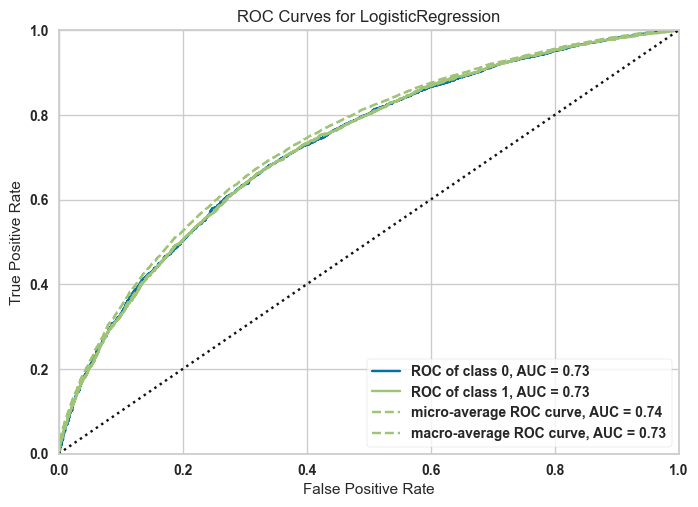

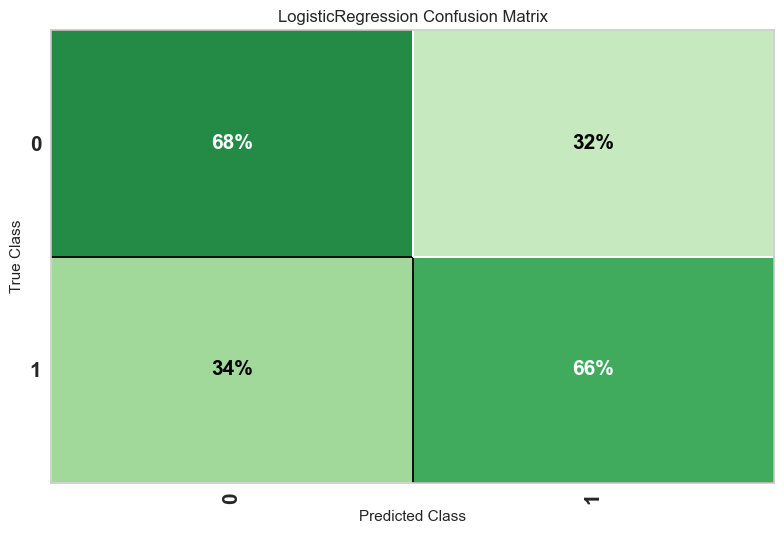

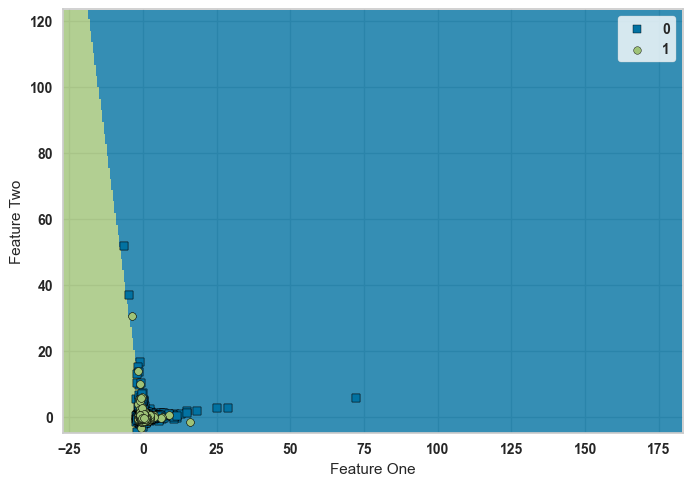

In [299]:
pycaret_classif.plot_model(tuned_model_1, plot = 'auc')
pycaret_classif.plot_model(tuned_model_1, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
pycaret_classif.plot_model(tuned_model_1, plot = 'boundary', use_train_data = True)

After tuning the **LinearDiscriminantAnalysis** model, you obtained the following mean results:

Accuracy: 0.6733
AUC: 0.7200
Recall: 0.6482
Precision: 0.1486
F1-score: 0.2418

Comparing these results to the previous untuned LogisticRegression model, there seems to be little to no improvement. The accuracy, AUC, recall, precision, and F1-score remain almost unchanged. This suggests that the tuning process did not significantly impact the performance of the LogisticRegression model in this case.

In [300]:
print(f"Tuning {type(top_5_models[1]).__name__} model")
tuned_model_2 = pycaret_classif.tune_model(top_5_models[1], optimize="Precision", n_iter=15, verbose=True)

Tuning LinearDiscriminantAnalysis model


Fitting 10 folds for each of 15 candidates, totalling 150 fits


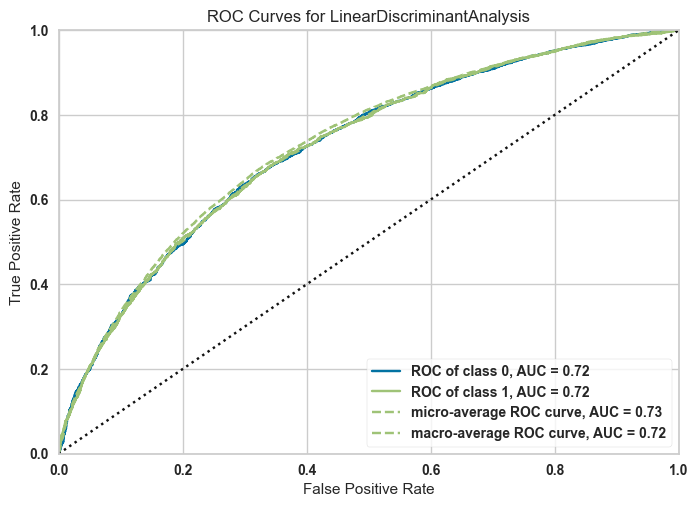

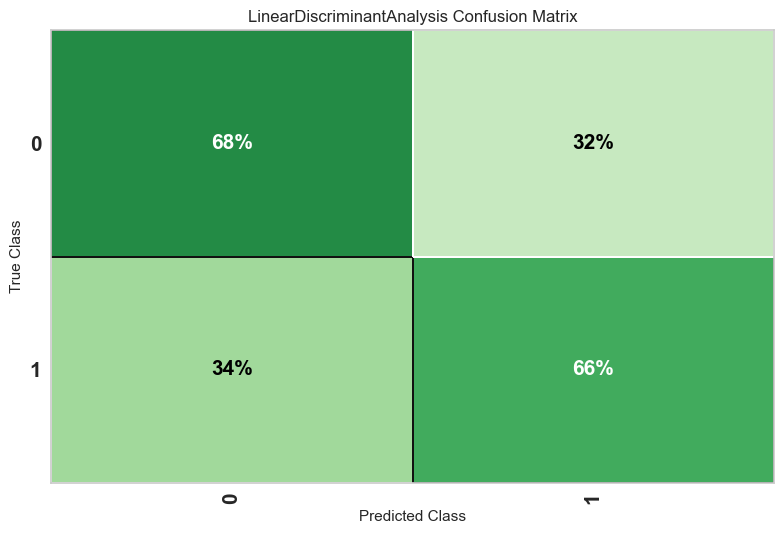

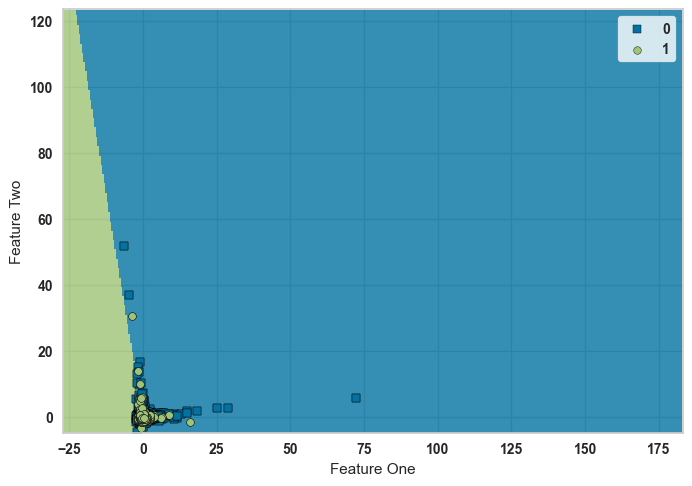

In [301]:
pycaret_classif.plot_model(tuned_model_2, plot = 'auc')
pycaret_classif.plot_model(tuned_model_2, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
pycaret_classif.plot_model(tuned_model_2, plot = 'boundary', use_train_data = True)

After tuning the **GradientBoostingClassifier** model, you obtained the following mean results:

Accuracy: 0.8674
AUC: 0.6281
Recall: 0.1538
Precision: 0.161
F1-score: 0.1573

Comparing these results to the previous untuned GradientBoostingClassifier model, there are some notable improvements. The accuracy has significantly increased, indicating that the tuned model is better at classifying instances correctly. However, the AUC has slightly decreased, suggesting a lower discrimination power of the model.

The recall, precision, and F1-score have also changed. The recall has decreased, indicating that the tuned model is identifying fewer positive instances correctly. On the other hand, the precision has increased, suggesting that the tuned model has reduced the number of false positives. The F1-score, which considers both precision and recall, has decreased slightly.

In [302]:
print(f"Tuning {type(top_5_models[2]).__name__} model")
tuned_model_3 = pycaret_classif.tune_model(top_5_models[2], optimize="Precision", n_iter=2, verbose=True) 

Tuning GradientBoostingClassifier model


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


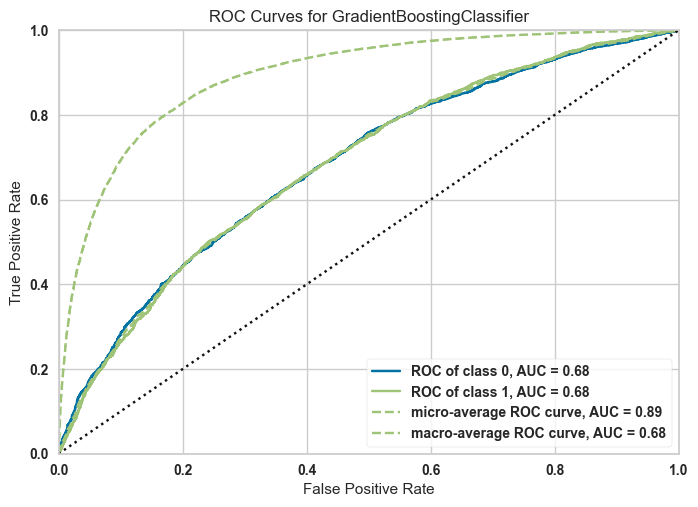

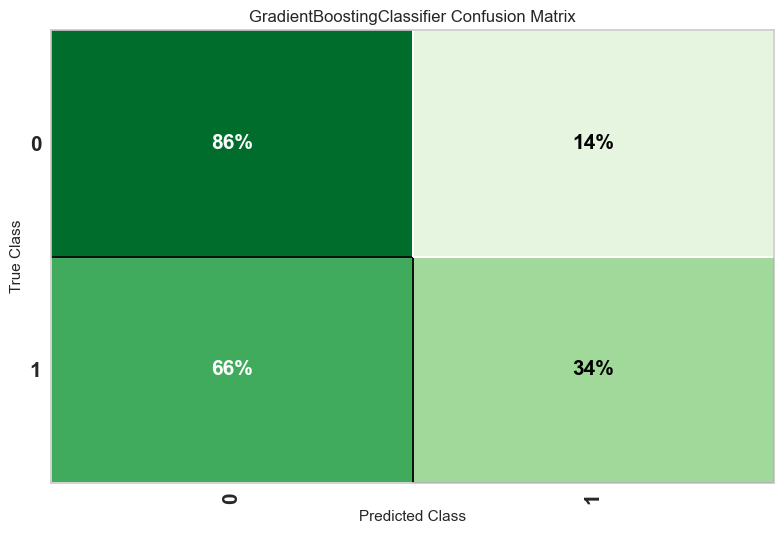

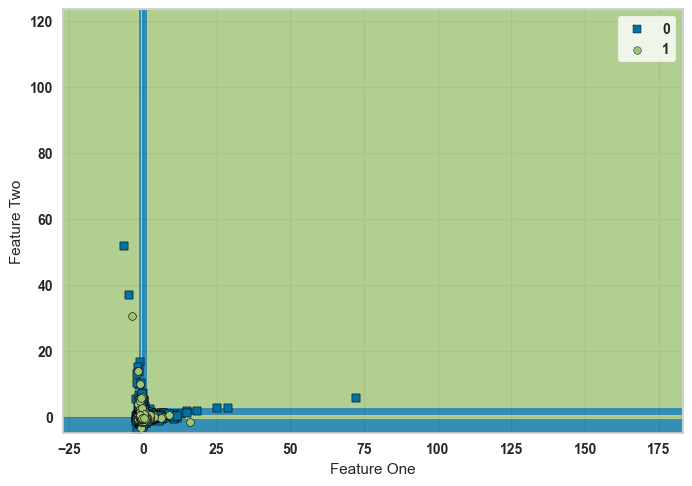

In [303]:
pycaret_classif.plot_model(tuned_model_3, plot = 'auc')
pycaret_classif.plot_model(tuned_model_3, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
pycaret_classif.plot_model(tuned_model_3, plot = 'boundary', use_train_data = True)

In [304]:
print(f"Tuning {type(top_5_models[3]).__name__} model")
tuned_model_4 = pycaret_classif.tune_model(top_5_models[3], optimize="Precision", n_iter=15, verbose=True) 

Tuning QuadraticDiscriminantAnalysis model


Fitting 10 folds for each of 15 candidates, totalling 150 fits


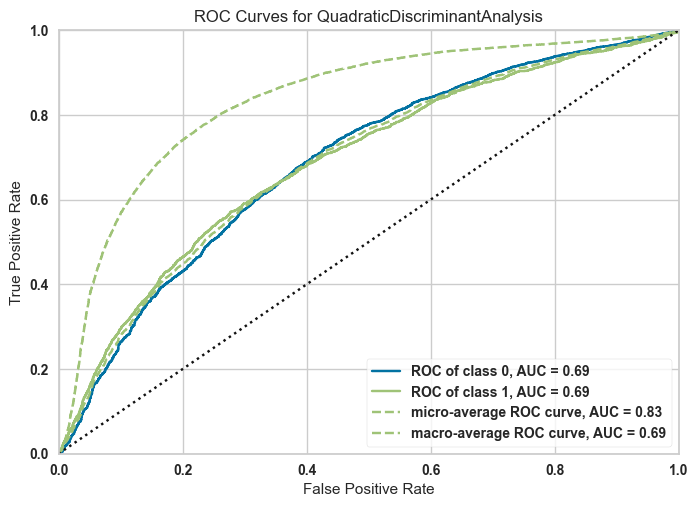

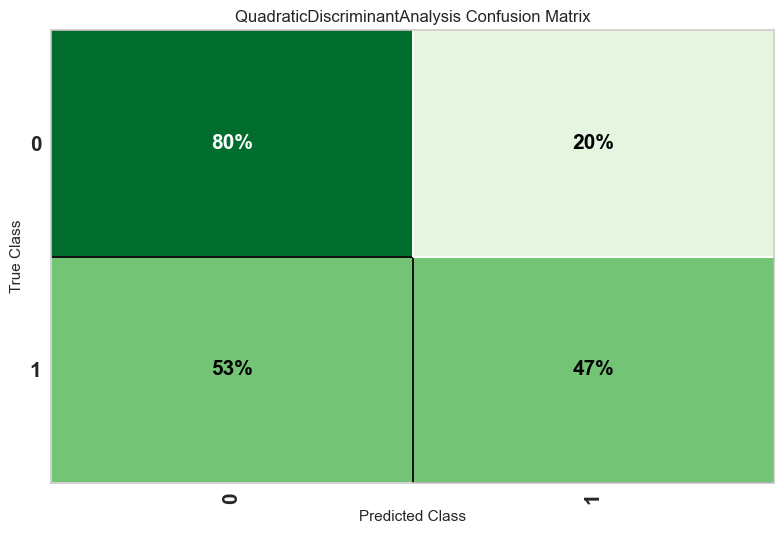

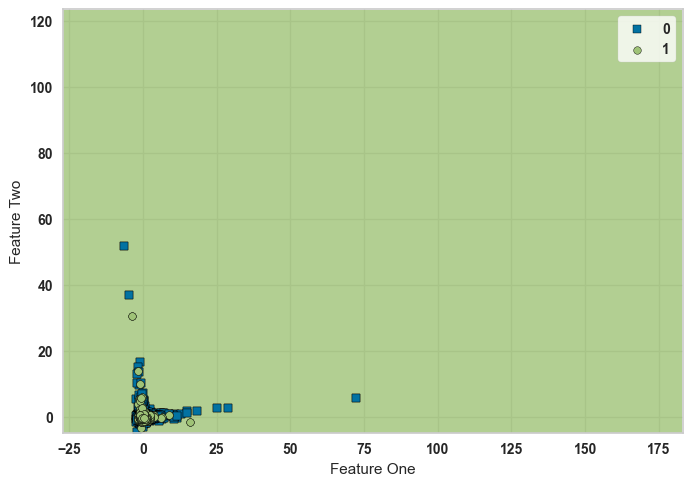

In [305]:
pycaret_classif.plot_model(tuned_model_4, plot = 'auc')
pycaret_classif.plot_model(tuned_model_4, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
pycaret_classif.plot_model(tuned_model_4, plot = 'boundary', use_train_data = True)

After tuning the **QuadraticDiscriminantAnalysis** model, you obtained the following mean results:

Accuracy: 0.6493
AUC: 0.6907
Recall: 0.6284
Precision: 0.1360
F1-score: 0.2236

Comparing these results to the previous untuned QuadraticDiscriminantAnalysis model, there are some changes in performance. The accuracy has slightly increased, indicating a better overall classification performance. The AUC has also increased, suggesting an improved ability of the model to discriminate between classes.

The recall has increased, indicating that the tuned model is identifying more positive instances correctly. However, the precision has decreased, indicating an increase in false positives. The F1-score, which balances precision and recall, has also increased.

In [311]:
print(f"Tuning {type(top_5_models[4]).__name__} model")
tuned_model_5 = pycaret_classif.tune_model(top_5_models[4], optimize="Precision", n_iter=15, verbose=True)

Tuning AdaBoostClassifier model


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


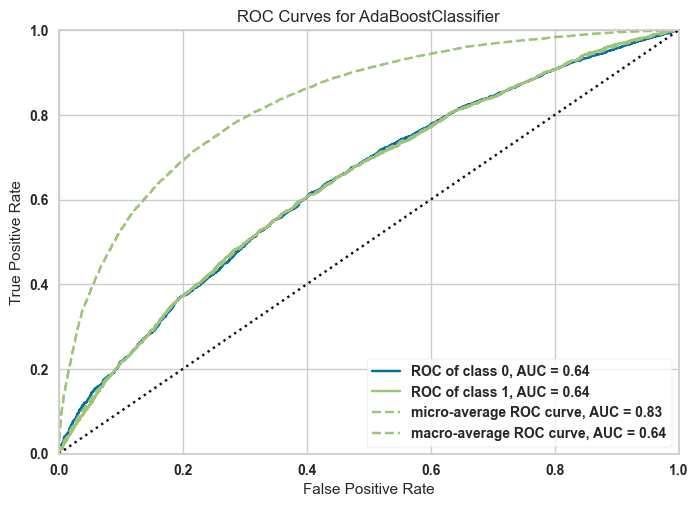

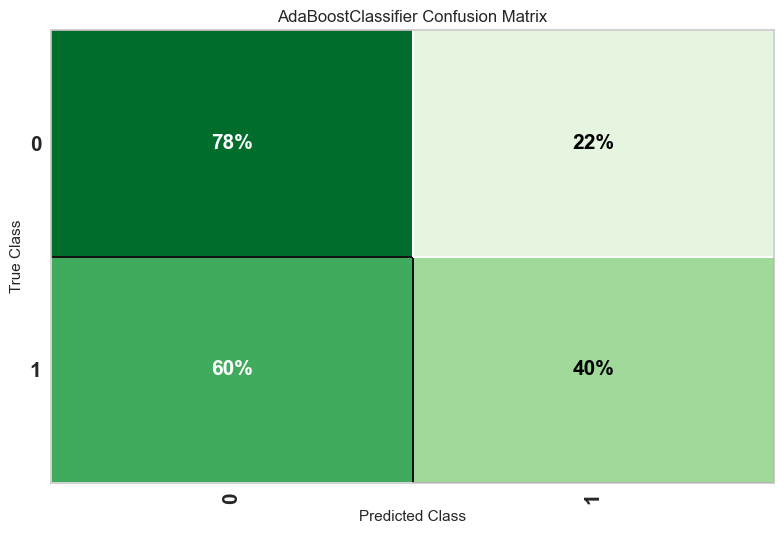

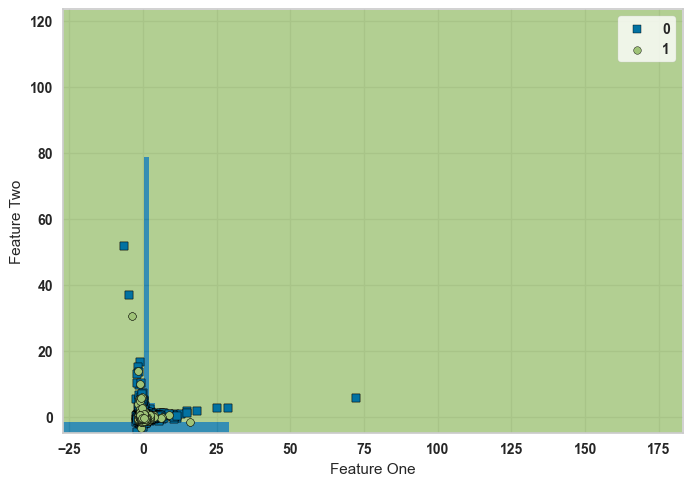

In [313]:
pycaret_classif.plot_model(tuned_model_5, plot = 'auc')
pycaret_classif.plot_model(tuned_model_5, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
pycaret_classif.plot_model(tuned_model_5, plot = 'boundary', use_train_data = True)

#### Bagging for Logistic Regression

Nevertheless, despite evaluating a variety of models, none of them yielded noteworthy results. In fact, some of the models exhibited signs of overfitting as their performance on the test data was inferior. Consequently, I made the decision to employ an ensemble learning technique known as Bagging. This ensemble method combines multiple models to enhance overall performance and stability. Specifically, I utilized Bagging with the model that demonstrated the best results among the tested models, which happened to be Logistic Regression. By implementing this ensemble approach, I aimed to address the overfitting issue and improve the predictive capabilities of the model for better generalization on unseen data.

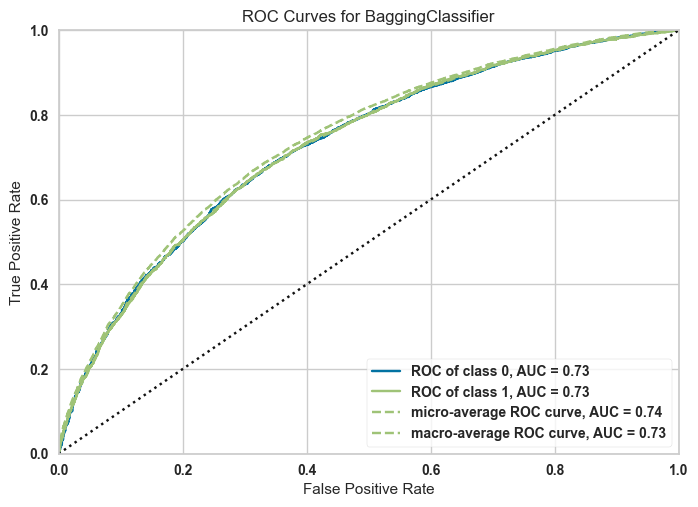

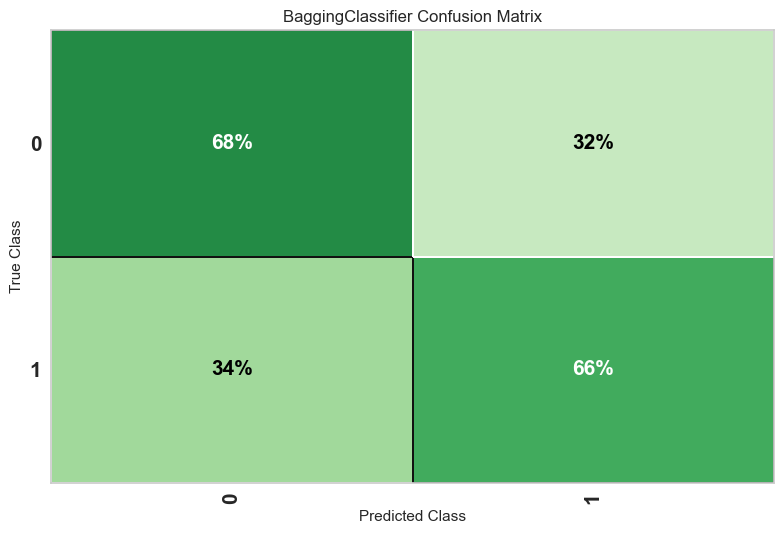

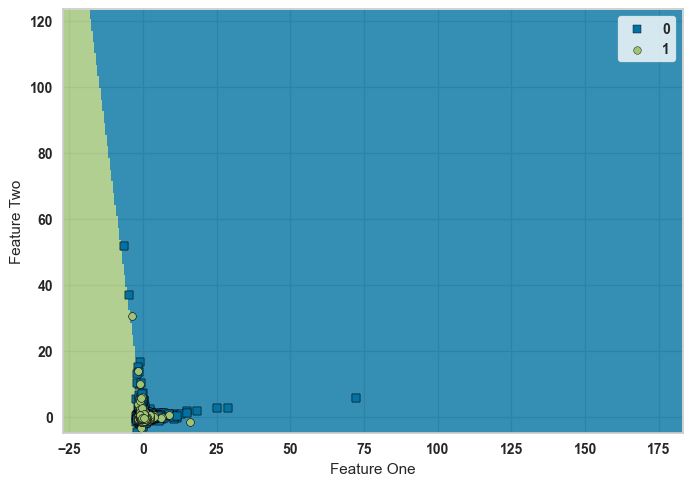

In [307]:
''' Performing bagging on best model '''
ensemble_model = pycaret_classif.ensemble_model(tuned_model_1, method='Bagging', optimize="AUC", choose_better=True, n_estimators=100)
pycaret_classif.plot_model(ensemble_model, plot = 'auc')
pycaret_classif.plot_model(ensemble_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
pycaret_classif.plot_model(ensemble_model, plot = 'boundary', use_train_data = True)

However, despite implementing Bagging, it did not significantly improve the model's performance. In light of this, I made the decision to adjust the classification threshold slightly. By lowering the threshold, I aimed to reduce the number of misclassified instances and improve the recall of the model's predictions, particularly for applications that posed more challenges. This adjustment was made in an effort to strike a balance between minimizing false negatives and maintaining a reasonable level of overall accuracy.

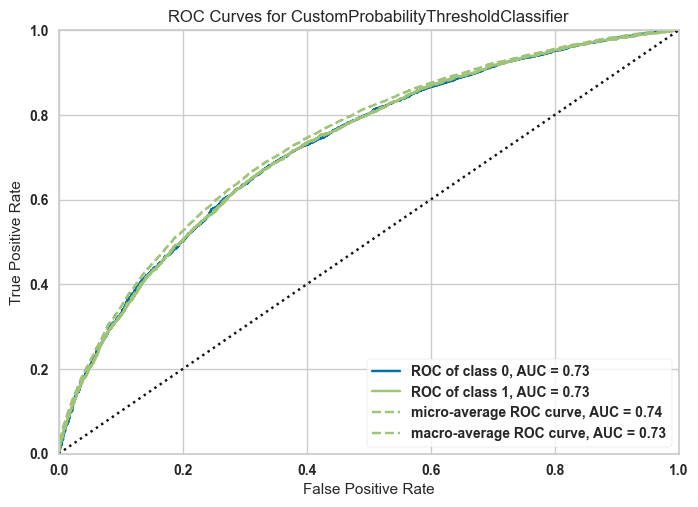

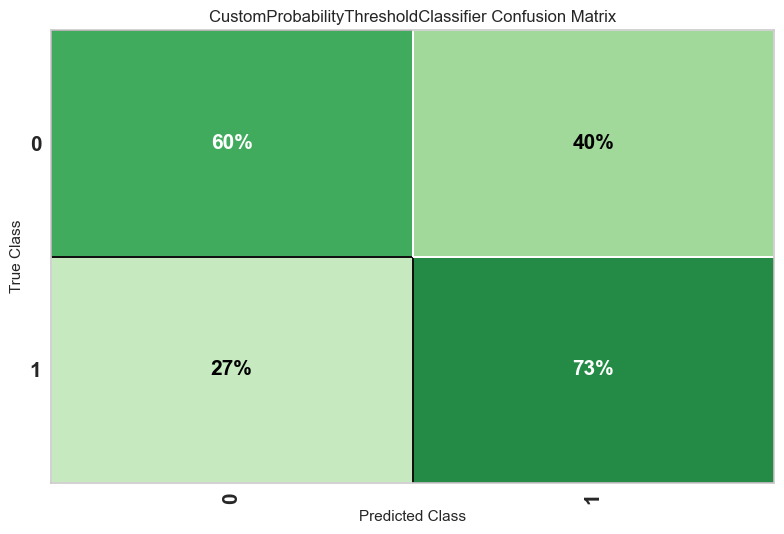

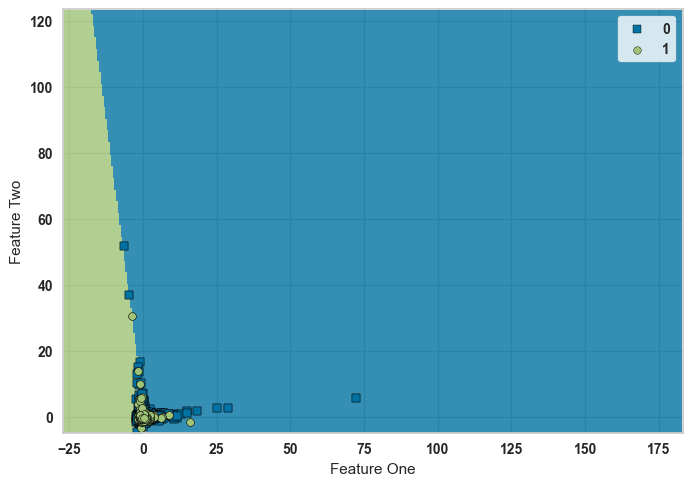

In [308]:
''' Lowering threshold for best model '''
final_ensemble_model = pycaret_classif.ensemble_model(tuned_model_1, method='Bagging', optimize="AUC", probability_threshold=0.45,
                                                      choose_better=True, n_estimators=100)
pycaret_classif.plot_model(final_ensemble_model, plot = 'auc')
pycaret_classif.plot_model(final_ensemble_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
pycaret_classif.plot_model(final_ensemble_model, plot = 'boundary', use_train_data = True)

### Model Deployment

In the final stage of the project, I needed to export the trained models in order to deploy the application on the Google Cloud platform. To accomplish this, I utilized the FastAPI framework to develop the backend of the application, which handles the communication between the user interface and the deployed models. For the frontend, I employed Streamlit, a user-friendly framework, to create an interactive and intuitive interface for users to interact with the application. By combining FastAPI for the backend and Streamlit for the frontend, I ensured a seamless and efficient user experience when utilizing the application on the Google Cloud platform.

In [309]:
''' Exporting preprocessor and pca to files '''
with open('application_preprocess.pkl', 'wb') as file:
    pickle.dump(final_preprocessor, file)

with open('application_pca_pipeline.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [310]:
''' Exporting target_prediction_model to file'''
with open('target_prediction_model.pkl', 'wb') as file: 
    pickle.dump(final_ensemble_model, file)

## Deployed Application

#### Frontend Created with Streamlit: https://frontend-service-kx4s6cgoga-ew.a.run.app/
#### Backend Created with FastAPI: https://backend-service-kx4s6cgoga-lm.a.run.app/